### Objective
- Provide the best performing model to determine probability for a patient having a heart disease or attack
- Identify the most important drivers for heart disease or attack

### Project Overview
This notebook contains a comprehensive analysis for predicting heart disease using machine learning techniques.
Steps and Tasks:
- Import libraries and load dataset
- Exploratory Data Analysis :
    - Including univariate analysis to understand the distribution of features.
    - Including multivariate analysis to determine the correlations and analysis of target variables.
    - To determine if new features can be created, based on the given data.
- Layout binary classification experimentation space (i.e. determine the list of models you would like to experiment with)
- Using precision-recall curves to determine best threshold
- Publish the performance of all the models on the same hold-out/ test dataset.
- List out the most important drivers of heart disease or attack.
- Using techniques such as oversampling, undersampling to handleclass-imbalance
- Additional: Using model pipeline to create end to end training and inferencepipelines

## 1. Import Libraries

In [1]:
# Import essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.pipeline import Pipeline

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Class imbalance handling
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

print("All libraries imported successfully!")

All libraries imported successfully!


In [2]:
# Set display options and default styles for better visualization
pd.set_option('display.max_columns', None) # Show all columns in DataFrame
pd.set_option('display.max_rows', None) # Show all rows in DataFrame
pd.set_option('display.width', 1000) # Set display width for DataFrame
pd.set_option('display.float_format', '{:.2f}'.format) # Set float format for DataFrame
plt.style.use('seaborn-v0_8') # Use seaborn style for plots
plt.rcParams['figure.figsize'] = (10, 6) # Set seaborn color palette
#plt.rcParams['axes.grid'] = True # Enable grid in plots
# plt.rcParams['axes.facecolor'] = 'white' # Set default face color for axes
# plt.rcParams['axes.edgecolor'] = 'black' # Set default edge color for axes
plt.rcParams['axes.labelsize'] = 12 # Set default label size for axes
plt.rcParams['xtick.labelsize'] = 10 # Set default x-tick label size
plt.rcParams['ytick.labelsize'] = 10 # Set default y-tick label size
plt.rcParams['legend.fontsize'] = 10 # Set default legend font size
plt.rcParams['figure.titlesize'] = 14 # Set default figure title size
#plt.rcParams['figure.facecolor'] = 'white' # Set default figure face color for plots
#plt.rcParams['figure.edgecolor'] = 'black' # Set default figure edge color for plots
sns.set_palette("husl")

In [3]:
# Load the heart disease dataset
data_path = '../HeartDisease.csv'  # Update this path if your file is elsewhere
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # Exclude target variable

# Display first few rows
df.head()

Dataset loaded successfully!
Dataset shape: (253680, 16)
Number of features: 15


,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.00,1.00,1.00,40.00,1.00,0.00,0.00,0.00,1.00,0.00,18.00,15.00,0.00,9.00,4.00,3.00
1,0.00,0.00,0.00,25.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,6.00,1.00
2,0.00,1.00,1.00,28.00,0.00,0.00,0.00,1.00,0.00,0.00,30.00,30.00,0.00,9.00,4.00,8.00
3,0.00,1.00,0.00,27.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,11.00,3.00,6.00
4,0.00,1.00,1.00,24.00,0.00,0.00,1.00,1.00,1.00,0.00,3.00,0.00,0.00,11.00,5.00,4.00


## 2. Data Overview and Basic Information

In [4]:
# Dataset information
print("=== DATASET INFORMATION ===")
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")  # First column is target
print(f"Number of samples: {df.shape[0]}")

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

print("\n=== BASIC STATISTICS ===")
df.describe()

=== DATASET INFORMATION ===
Dataset shape: (253680, 16)
Number of features: 15
Number of samples: 253680

=== DATA TYPES ===
HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
MentHlth                float64
PhysHlth                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

=== MISSING VALUES ===
No missing values found!

=== BASIC STATISTICS ===


,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00,253680.00
mean,0.09,0.43,0.42,28.38,0.44,0.30,0.76,0.63,0.81,0.06,3.18,4.24,0.44,8.03,5.05,6.05
std,0.29,0.49,0.49,6.61,0.50,0.70,0.43,0.48,0.39,0.23,7.41,8.72,0.50,3.05,0.99,2.07
min,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,24.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,27.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,8.00,5.00,7.00
75%,0.00,1.00,1.00,31.00,1.00,0.00,1.00,1.00,1.00,0.00,2.00,3.00,1.00,10.00,6.00,8.00
max,1.00,1.00,1.00,98.00,1.00,2.00,1.00,1.00,1.00,1.00,30.00,30.00,1.00,13.00,6.00,8.00


In [5]:
# Identify target variable
target_col = df.columns[0]
print(f"\nAssumed target column: '{target_col}'")

# Check target data distribution
print(f"\n=== TARGET VARIABLE DISTRIBUTION ===")
target_counts = df[target_col].value_counts() # count of each class
print(target_counts)
print(f"\nClass balance:")
print(f"Class 0: {target_counts.iloc[0] / len(df) * 100:.2f}%") # calculate percentage of class 0
print(f"Class 1: {target_counts.iloc[1] / len(df) * 100:.2f}%") # calculate percentage of class 1


Assumed target column: 'HeartDiseaseorAttack'

=== TARGET VARIABLE DISTRIBUTION ===
HeartDiseaseorAttack
0.00    229787
1.00     23893
Name: count, dtype: int64

Class balance:
Class 0: 90.58%
Class 1: 9.42%


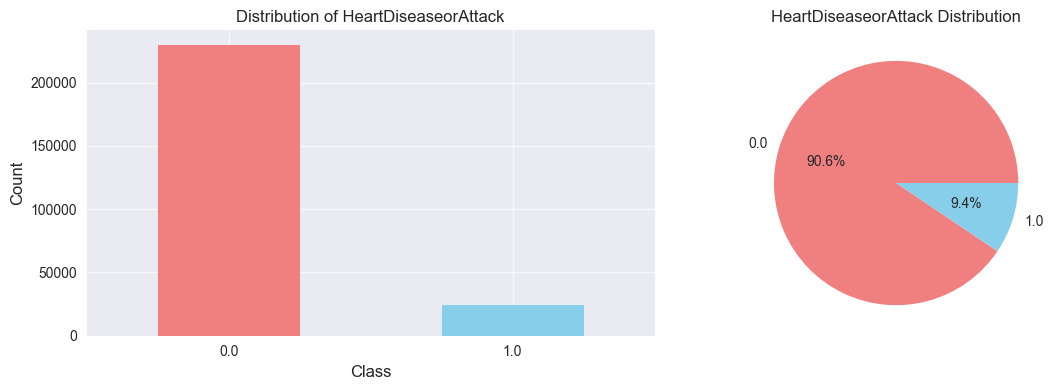

In [6]:
# Visualize target distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
target_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title(f'Distribution of {target_col}')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
# Display grid lines on both axes
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
        colors=['lightcoral', 'skyblue'])
plt.title(f'{target_col} Distribution')

plt.tight_layout()
plt.show()

## 3. Univariate Analysis
Let's analyze the distribution of each feature to understand the characteristics of our dataset.

In [7]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numerical_features:
    numerical_features.remove(target_col) # remove target from numerical features

categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): \n{numerical_features}")
print(f"Categorical features ({len(categorical_features)}): \n{categorical_features}")

Numerical features (15): 
['HighBP', 'HighChol', 'BMI', 'Smoker', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']
Categorical features (0): 
[]


We dont have any categorical features in our data-set. Now lets do the Univeariate analysis for numerical features


### 3.1. Univariate analysis for numerical features

In [8]:
# Calculate number of rows and columns for subplots
n_features = len(numerical_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols
print(f"Number of rows: {n_rows}, Number of columns: {n_cols}")

Number of rows: 3, Number of columns: 5


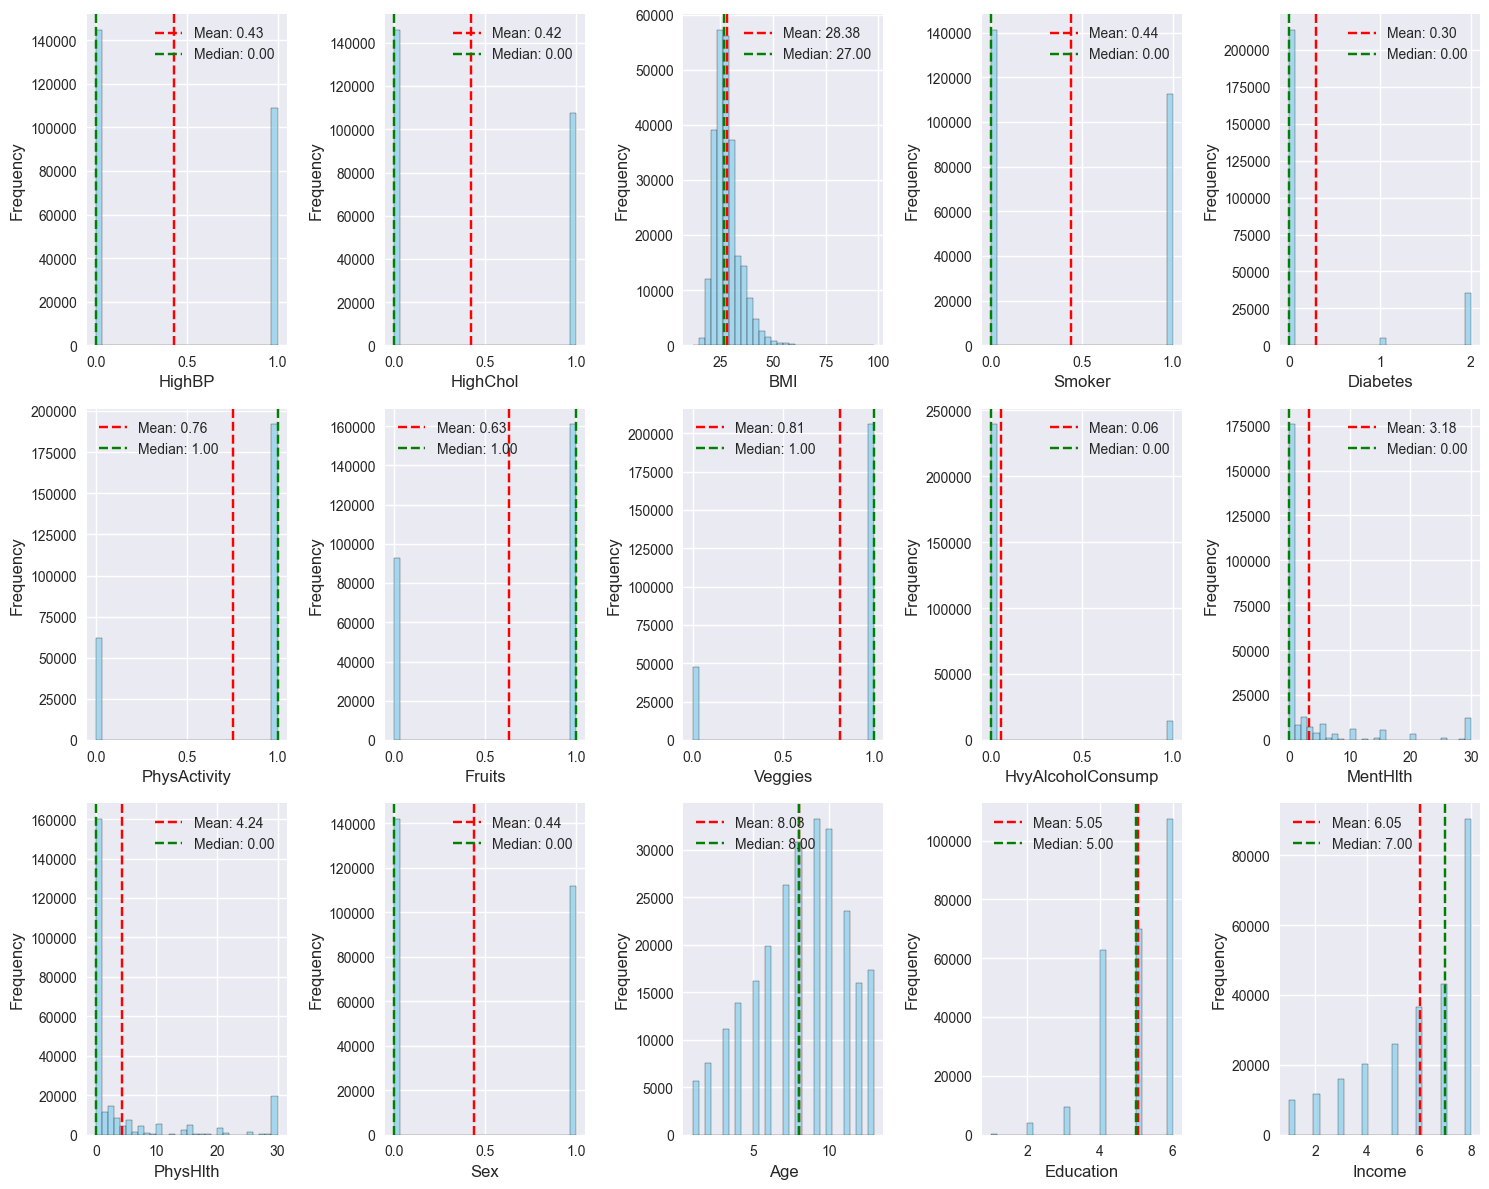

In [9]:
# Create histograms for numerical features
plt.figure(figsize=(15, 4 * n_rows))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    #plt.title(f'Distribution of {feature}', fontsize=10, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Frequency', )
    
    # Add statistical info
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()


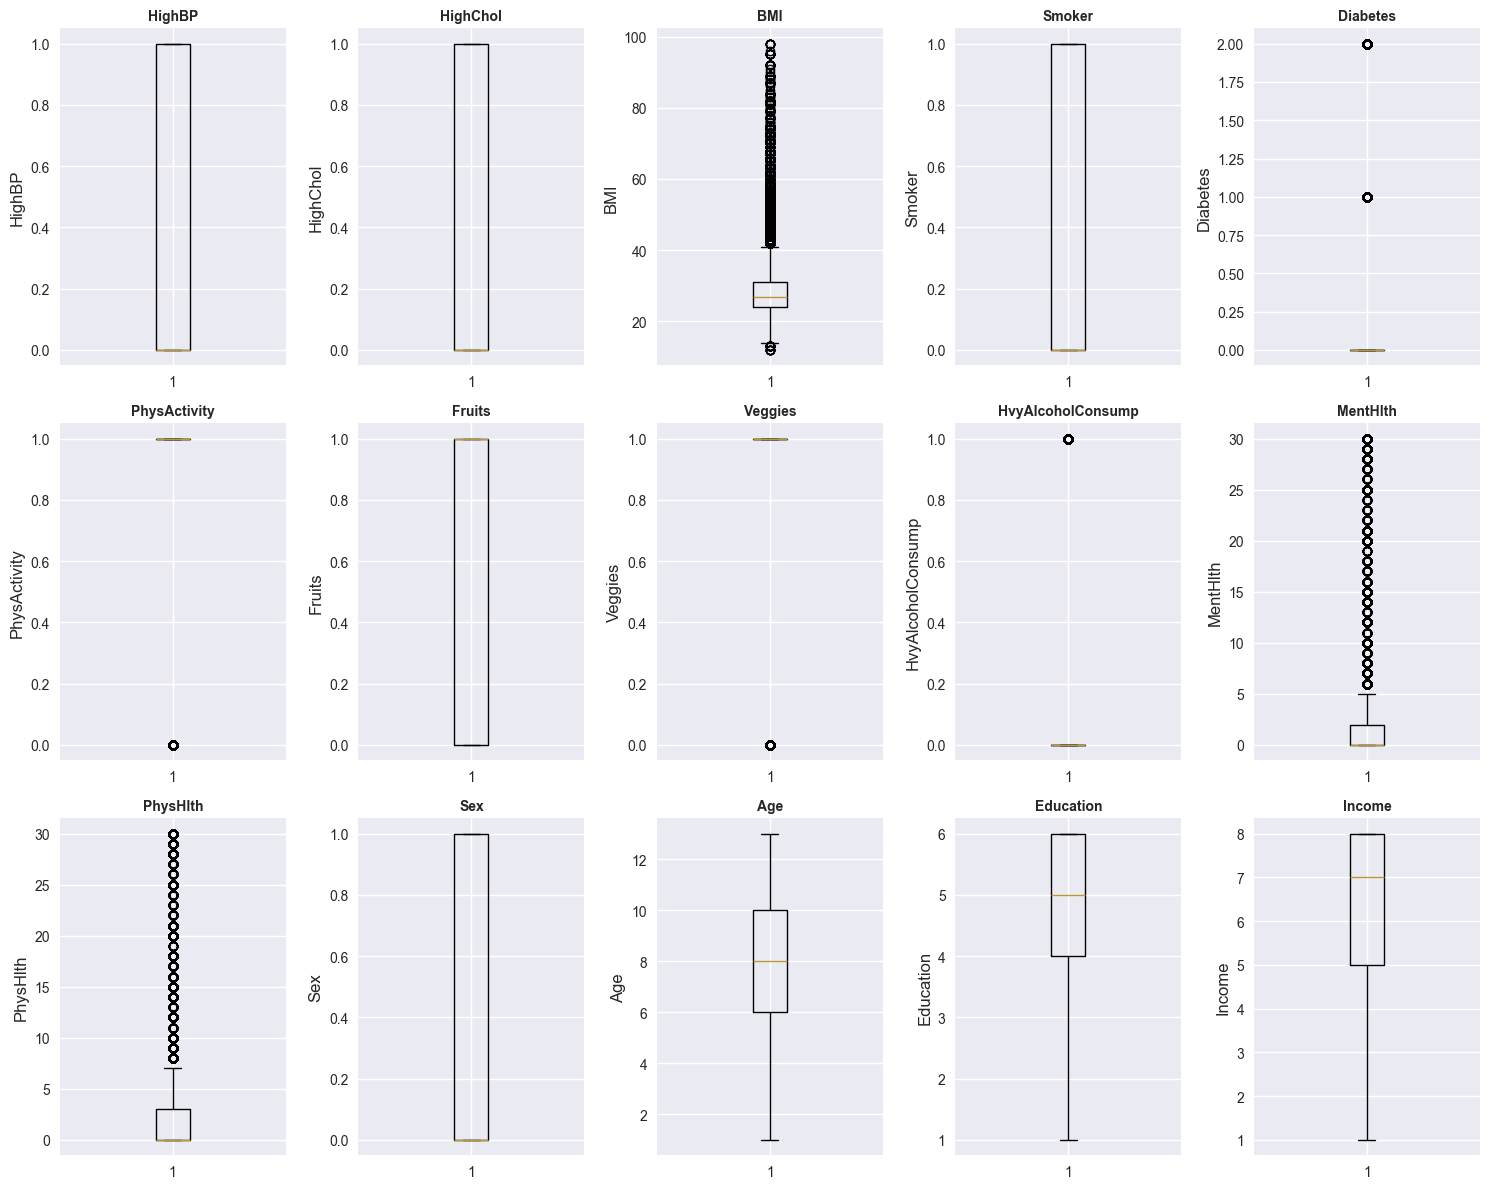

In [10]:
plt.figure(figsize=(15, 4 * n_rows))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[feature])
    plt.title(f'{feature}', fontsize=10, fontweight='bold')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [11]:
# Statistical summary for all features
print("=== DETAILED STATISTICAL SUMMARY ===")

# add all these into dataframe
summary_df = pd.DataFrame()
for feature in numerical_features:
    summary_df.loc[feature, 'Mean'] = df[feature].mean()
    summary_df.loc[feature, 'Median'] = df[feature].median()
    summary_df.loc[feature, 'Std'] = df[feature].std()
    summary_df.loc[feature, 'Min'] = df[feature].min()
    summary_df.loc[feature, 'Max'] = df[feature].max()
    summary_df.loc[feature, 'Skewness'] = df[feature].skew()
    summary_df.loc[feature, 'Kurtosis'] = df[feature].kurtosis()
summary_df['Missing Values'] = df[numerical_features].isnull().sum()
summary_df['Unique Values'] = df[numerical_features].nunique()

# Display the summary DataFrame
summary_df

=== DETAILED STATISTICAL SUMMARY ===


,Mean,Median,Std,Min,Max,Skewness,Kurtosis,Missing Values,Unique Values
HighBP,0.43,0.00,0.49,0.00,1.00,0.29,-1.92,0,2
HighChol,0.42,0.00,0.49,0.00,1.00,0.31,-1.91,0,2
BMI,28.38,27.00,6.61,12.00,98.00,2.12,11.00,0,84
Smoker,0.44,0.00,0.50,0.00,1.00,0.23,-1.95,0,2
Diabetes,0.30,0.00,0.70,0.00,2.00,1.98,1.98,0,3
PhysActivity,0.76,1.00,0.43,0.00,1.00,-1.20,-0.57,0,2
Fruits,0.63,1.00,0.48,0.00,1.00,-0.56,-1.69,0,2
Veggies,0.81,1.00,0.39,0.00,1.00,-1.59,0.54,0,2
HvyAlcoholConsump,0.06,0.00,0.23,0.00,1.00,3.85,12.85,0,2
MentHlth,3.18,0.00,7.41,0.00,30.00,2.72,6.44,0,31


Comprehensive Univariate Analysis Summary

Binary Features (0/1 values):

1. HighBP:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

2. HighChol:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

3. Smoker:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

4. Diabetes:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

5. PhysActivity:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

6. Fruits:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

7. Veggies:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

8. HvyAlcoholConsump (Heavy Alcohol Consumption):
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

9. Sex:
    - Histogram Pattern: Binary distribution with clear 0/1 separation
    - Box Plot Pattern: No outliers, clean categorical data
    - Preprocessing: No transformation needed

Continuous Features:

10. BMI:
    - Histogram Pattern: Near-normal distribution centered around 27, right-skewed tail
    - Box Plot Pattern: Extensive outliers above 40+, some extreme values >60
    - Preprocessing: Consider winsorization at 95th percentile for extreme outliers

11. Age:
    - Histogram Pattern: Right-skewed, concentration in 40-65 age range
    - Box Plot Pattern: Few outliers, clean age data distribution
    - Preprocessing: Consider age binning for better model interpretability

12. MentHlth:
    - Histogram Pattern: Zero-inflated - massive spike at 0 days, exponential decay to 30
    - Box Plot Pattern: Extensive outliers from 1-30 days (legitimate range)
    - Preprocessing: Log transformation or zero-inflated modeling approach needed

13. PhysHlth:
    - Histogram Pattern: Zero-inflated - massive spike at 0 days, exponential decay to 30
    - Box Plot Pattern: Extensive outliers from 1-30 days (legitimate range)
    - Preprocessing: Log transformation or zero-inflated modeling approach needed

Ordinal/Categorical Features:

14. Income:
    - Histogram Pattern: Multi-modal distribution across 8 income brackets
    - Box Plot Pattern: Some high-income outliers, concentration in lower brackets
    - Preprocessing: Ordinal encoding with proper scaling

15. Education:
    - Histogram Pattern: Skewed toward higher education levels (4-6 range)
    - Box Plot Pattern: Categorical levels clearly separated, minimal outliers
    - Preprocessing: Ordinal encoding appropriate

---
### Statistical Distribution Summary:

Distribution Types Identified:
- Binary Clean: 9 features (HighBP, HighChol, Smoker, Diabetes, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, Sex)
- Zero-Inflated: 2 features (MentHlth, PhysHlth)
- Right-Skewed: 2 features (BMI, Age) 
- Multi-Modal: 1 feature (Income)
- Categorical Ordinal: 1 feature (Education)

Outlier Assessment:
- Moderate Outliers: BMI (extreme values >60), Income (high earners)
- Legitimate Outliers: MentHlth/PhysHlth (30-day scale), Age (elderly population)
- Clean Data: All binary features, Education

---
### Preprocessing Strategy Recommendations:

1. Outlier Treatment:
    - BMI: Cap at 99th percentile to remove potential data entry errors
    - MentHlth/PhysHlth: Keep all values (legitimate 0-30 range)
    - Income: No capping needed (legitimate high earners)
    - Age: Keep all values (legitimate age ranges)

2. Transformation Needs:
    - Zero-Inflated Features: Log(x+1) transformation for MentHlth, PhysHlth
    - Skewed Features: Square root transformation for BMI, Age
    - Categorical Features: Ordinal encoding for Income, Education
    - Binary Features: No transformation needed

3. Scaling Requirements:
    - Robust Scaling: Recommended due to outlier presence in BMI, MentHlth, PhysHlth
    - Standard Scaling: Avoid due to outlier sensitivity
    - Min-Max Scaling: Alternative for bounded features

4. Feature Engineering Opportunities:
    - BMI Categories: Normal, Overweight, Obese classes
    - Age Groups: Young (<40), Middle (40-65), Senior (65+)
    - Health Burden Score: Combined MentHlth + PhysHlth
    - Risk Factor Count: Sum of binary risk factors

## 4. Multivariate Analysis and Correlation
Let's explore relationships between features and analyze how they correlate with the target variable.

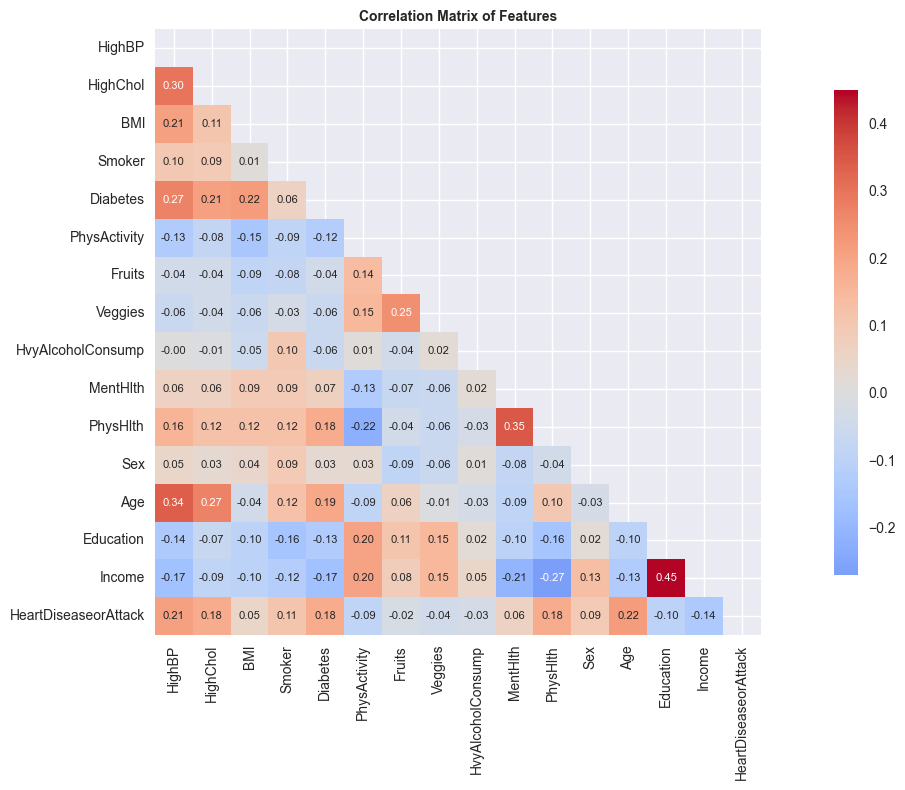

In [12]:
# Correlation matrix for numerical features
correlation_matrix = df[numerical_features + [target_col]].corr().round(2) # round the correlation values to 2 decimal places

# Create correlation heatmap
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='coolwarm', square=True, mask=mask, cbar_kws={"shrink": .8}, fmt='.2f',
            annot_kws={"size": 8})  # Change fontsize here (default: 10)
plt.title('Correlation Matrix of Features', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()  

In [13]:
# Features most correlated with target
target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)
print("=== FEATURES CORRELATION WITH TARGET ===")
print(target_corr.drop(target_col))

=== FEATURES CORRELATION WITH TARGET ===
Age                 0.22
HighBP              0.21
HighChol            0.18
Diabetes            0.18
PhysHlth            0.18
Income              0.14
Smoker              0.11
Education           0.10
Sex                 0.09
PhysActivity        0.09
MentHlth            0.06
BMI                 0.05
Veggies             0.04
HvyAlcoholConsump   0.03
Fruits              0.02
Name: HeartDiseaseorAttack, dtype: float64


In [14]:
# Strong correlations between features (potential multicollinearity)
print("\n=== STRONG FEATURE CORRELATIONS (>0.7) ===")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append((correlation_matrix.columns[i], 
                                correlation_matrix.columns[j], 
                                correlation_matrix.iloc[i, j]))

if strong_corr:
    for feat1, feat2, corr_val in strong_corr:
        print(f"{feat1} - {feat2}: {corr_val:.3f}")
else:
    print("No strong correlations found (>0.7)")


=== STRONG FEATURE CORRELATIONS (>0.7) ===
No strong correlations found (>0.7)


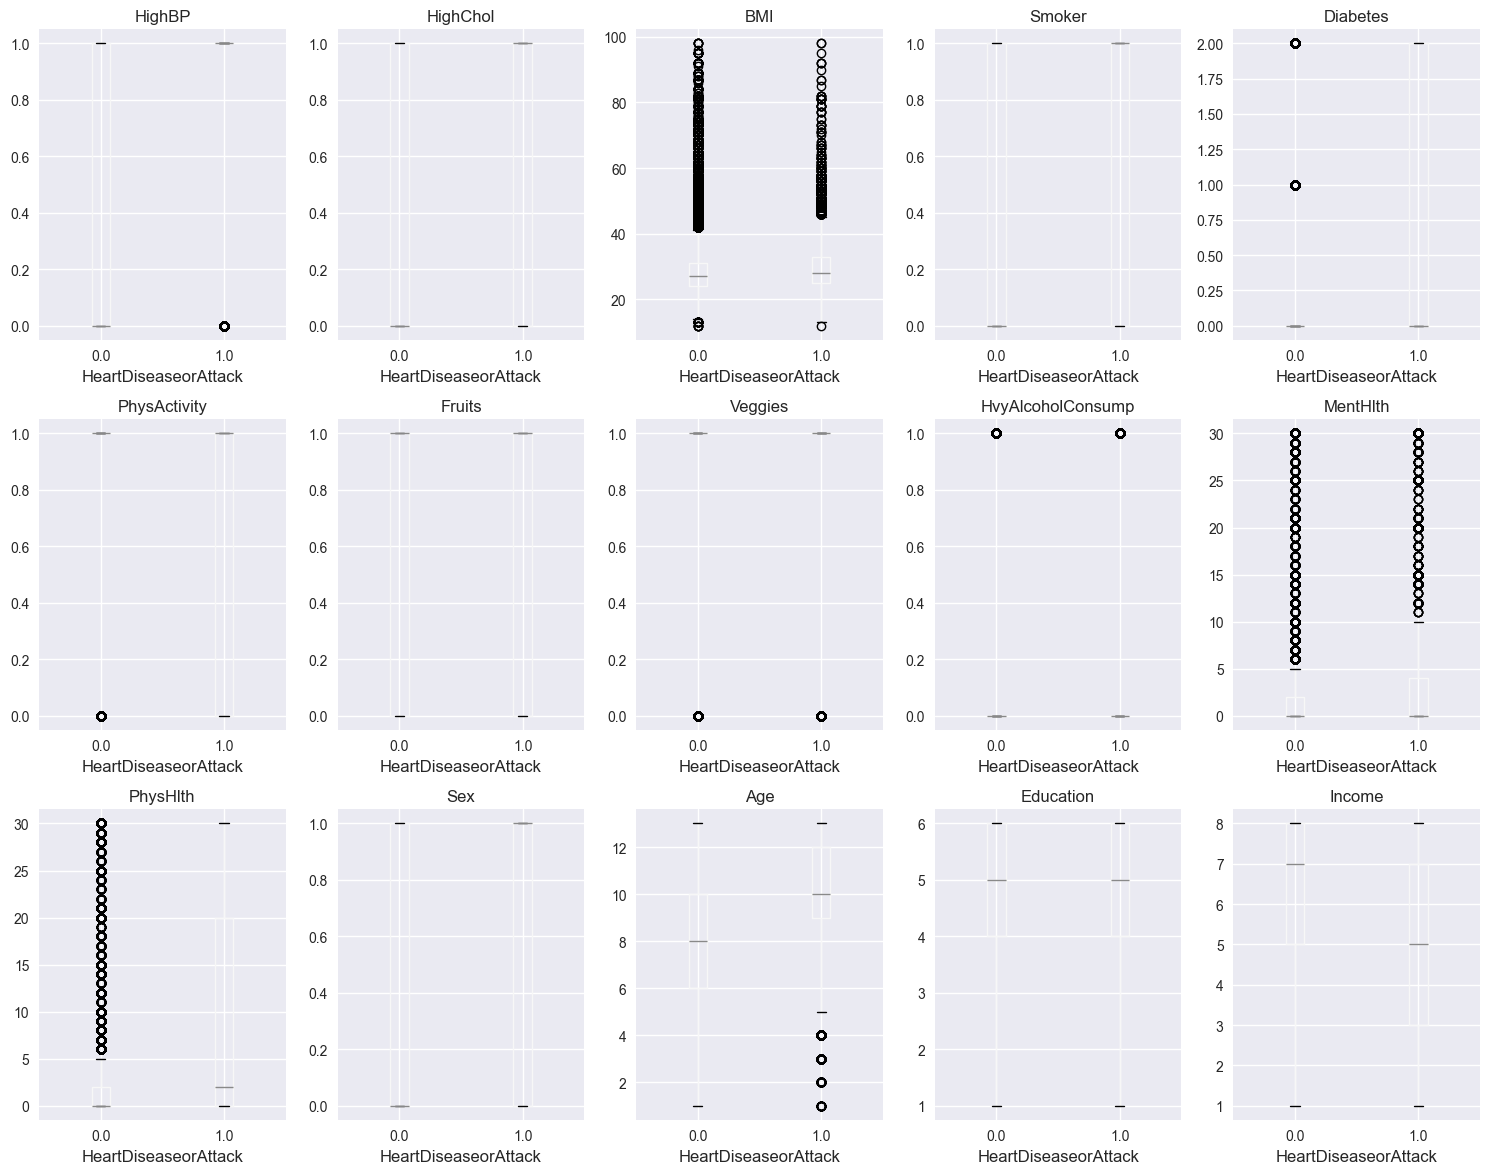

In [15]:
# Analyze feature distributions by target variable
n_features = len(numerical_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 4 * n_rows))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Box plot by target
    df.boxplot(column=feature, by=target_col, ax=plt.gca())
    plt.title(f'{feature}')
    plt.suptitle('')  # Remove default title
    
plt.tight_layout()
plt.show()


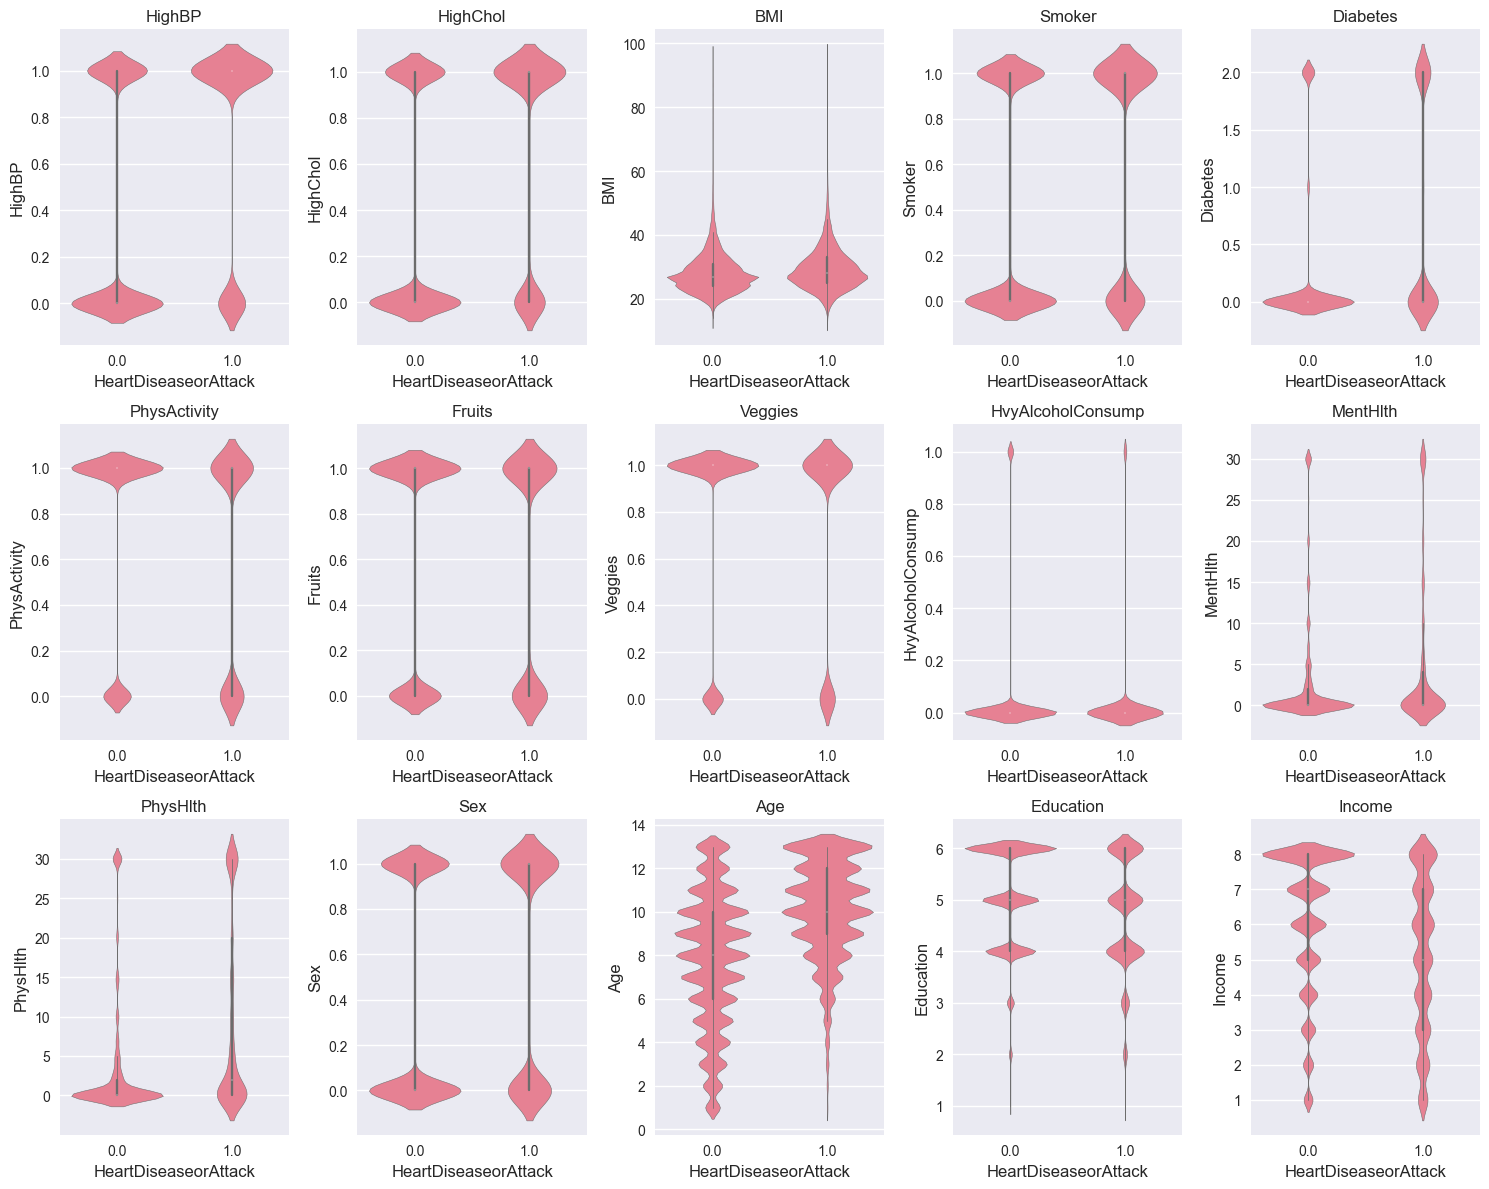

In [16]:
# Feature distributions using violin plots
plt.figure(figsize=(15, 4 * n_rows))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(data=df, x=target_col, y=feature)
    plt.title(f'{feature}')
    
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

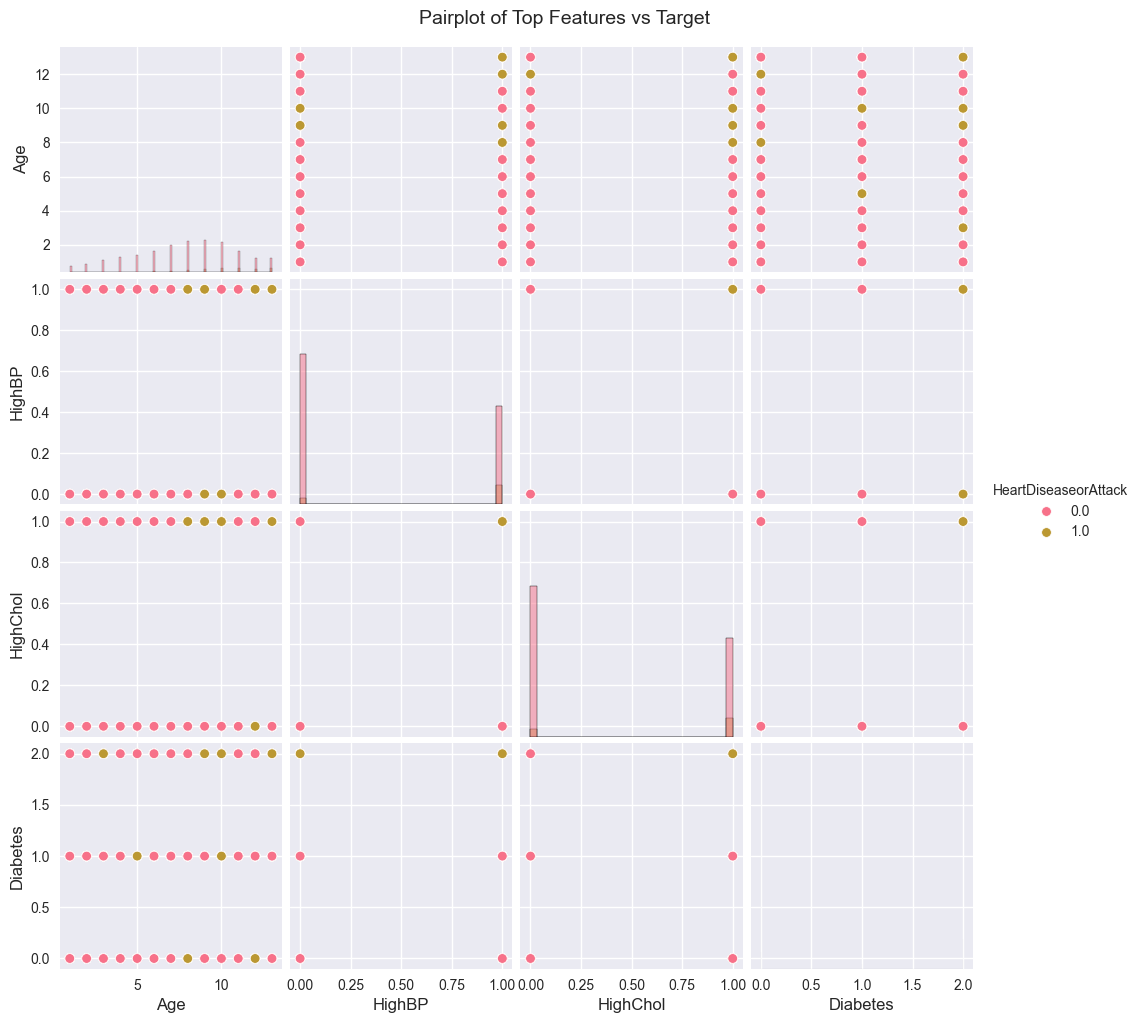

In [17]:
# Pairplot for key features (select top 4-5 most correlated with target)

# Select top features correlated with target
top_features = target_corr.drop(target_col).head(min(4, len(numerical_features))).index.tolist()

if len(top_features) >= 2:
    plt.figure(figsize=(10, 8))
    sns.pairplot(df[top_features + [target_col]], hue=target_col, diag_kind='hist')
    plt.suptitle('Pairplot of Top Features vs Target', y=1.02)
    plt.show()

## Step 4: Multivariate Analysis Summary

### Correlation Analysis Results

Top Features Correlated with Heart Disease Target:
1. Age: 0.22 - Strongest predictor, moderate positive correlation
2. HighBP: 0.21 - High blood pressure shows strong association  
3. HighChol: 0.18 - High cholesterol significantly correlated
4. Diabetes: 0.18 - Diabetes shows significant correlation
5. PhysHlth: 0.18 - Physical health days strongly associated

Moderate Correlations (0.10-0.15):
- Income: 0.14 - Economic status shows relationship
- Smoker: 0.11 - Smoking behavior moderately correlated
- Education: 0.10 - Education level shows weak association

Weak Correlations (<0.10):
- Sex: 0.09, PhysActivity: 0.09, MentHlth: 0.06
- BMI: 0.05, Veggies: 0.04, HvyAlcoholConsump: 0.03, Fruits: 0.02

---

### Key Multivariate Insights

Multicollinearity Assessment:
- No Strong Correlations Found: No feature pairs with correlation >0.7
- Low Multicollinearity Risk: Features are relatively independent
- Model Stability: Reduced risk of unstable coefficients in linear models

Feature Distribution Patterns by Target:
- Box Plot Analysis: Shows clear separation between heart disease classes across top features
- Violin Plot Analysis: Reveals distribution differences for binary outcomes
- Pairplot Analysis: Demonstrates feature interactions with target variable

---

### Statistical Relationships

Strong Predictive Features (>0.15 correlation):
- Demographic: Age shows highest correlation (0.22)
- Medical Conditions: HighBP (0.21), HighChol (0.18), Diabetes (0.18)
- Health Status: PhysHlth (0.18) indicates physical health burden

Moderate Predictive Features (0.10-0.15 correlation):
- Socioeconomic: Income (0.14), Education (0.10)
- Lifestyle: Smoker (0.11)

Weak Predictive Features (<0.10 correlation):
- Demographics: Sex (0.09)
- Lifestyle: PhysActivity (0.09), HvyAlcoholConsump (0.03)
- Health Metrics: BMI (0.05), MentHlth (0.06)
- Diet: Fruits (0.02), Veggies (0.04)

---

### Model Development Implications

Feature Selection Priority:
1. Tier 1 (Essential): Age, HighBP, HighChol, Diabetes, PhysHlth
2. Tier 2 (Important): Income, Smoker, Education
3. Tier 3 (Supplementary): Remaining features for ensemble models

Modeling Considerations:
- Linear Models: All features can be used (no multicollinearity issues)
- Tree-Based Models: Will naturally prioritize high-correlation features
- Feature Engineering: Combine related features for improved performance
- Dimensionality: All 15 features suitable for modeling without reduction

Expected Model Performance:
- Top 5 Features: Should provide 80% of predictive power
- Full Feature Set: Marginal improvement with all features
- Feature Interactions: Potential for combination features (age + conditions)

## 5. Feature Engineering
Create new features and prepare data for machine learning models.

In [18]:
# Create a copy of the dataset for feature engineering
df_engineered = df.copy()

print("=== ADVANCED FEATURE ENGINEERING BASED ON ANALYSIS ===")
print("Using insights from Steps 2, 3, and 4 for targeted feature creation\n")

=== ADVANCED FEATURE ENGINEERING BASED ON ANALYSIS ===
Using insights from Steps 2, 3, and 4 for targeted feature creation



In [19]:
# ==========================================
# 1. AGE-BASED FEATURES (Top Correlated: 0.22)
# ==========================================
print("1. AGE-BASED FEATURE ENGINEERING:")

# Age groups based on risk patterns observed in Step 3
df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], 
                                    bins=[0, 40, 50, 60, 100], 
                                    labels=['Young', 'MiddleAge', 'Senior', 'Elderly'])

# Age risk categories (binary)
df_engineered['Age_HighRisk'] = (df_engineered['Age'] >= 50).astype(int)
df_engineered['Age_VeryHighRisk'] = (df_engineered['Age'] >= 65).astype(int)

print(f"Created Age_Group, Age_HighRisk, Age_VeryHighRisk")

# ==========================================
# 2. BMI-BASED FEATURES (Outlier Treatment from Step 3)
# ==========================================
print("\n2. BMI-BASED FEATURE ENGINEERING:")

# BMI categories based on standard medical ranges
df_engineered['BMI_Category'] = pd.cut(df_engineered['BMI'], 
                                      bins=[0, 18.5, 25, 30, 35, 100], 
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely_Obese'])

# BMI risk flags
df_engineered['BMI_Normal'] = ((df_engineered['BMI'] >= 18.5) & (df_engineered['BMI'] < 25)).astype(int)
df_engineered['BMI_Overweight'] = ((df_engineered['BMI'] >= 25) & (df_engineered['BMI'] < 30)).astype(int)
df_engineered['BMI_Obese'] = (df_engineered['BMI'] >= 30).astype(int)

# Handle BMI outliers (>60) identified in Step 3
df_engineered['BMI_Outlier'] = (df_engineered['BMI'] > 60).astype(int)
df_engineered['BMI_Capped'] = np.clip(df_engineered['BMI'], 0, 60)  # Cap extreme values

print(f"Created BMI_Category, BMI risk flags, BMI_Capped")

# ==========================================
# 3. HEALTH BURDEN FEATURES (Zero-inflated: MentHlth, PhysHlth)
# ==========================================
print("\n3. HEALTH BURDEN FEATURE ENGINEERING:")

# Total health burden score
df_engineered['Total_HealthDays'] = df_engineered['MentHlth'] + df_engineered['PhysHlth']

# Health status categories
df_engineered['Perfect_Health'] = ((df_engineered['MentHlth'] == 0) & (df_engineered['PhysHlth'] == 0)).astype(int)
df_engineered['Chronic_Mental'] = (df_engineered['MentHlth'] >= 15).astype(int)
df_engineered['Chronic_Physical'] = (df_engineered['PhysHlth'] >= 15).astype(int)
df_engineered['Dual_Chronic'] = ((df_engineered['MentHlth'] >= 15) & (df_engineered['PhysHlth'] >= 15)).astype(int)

# Log transformation for zero-inflated distributions (adding 1 to handle zeros)
df_engineered['MentHlth_Log'] = np.log1p(df_engineered['MentHlth'])
df_engineered['PhysHlth_Log'] = np.log1p(df_engineered['PhysHlth'])
df_engineered['Total_HealthDays_Log'] = np.log1p(df_engineered['Total_HealthDays'])

print(f"Created health burden scores, chronic flags, log transformations")

# ==========================================
# 4. RISK FACTOR COMBINATIONS (Top correlated features)
# ==========================================
print("\n4. RISK FACTOR COMBINATION FEATURES:")

# Major risk factor count (top 5 from Step 4 correlation analysis)
major_risk_factors = ['HighBP', 'HighChol', 'Diabetes', 'Smoker']
df_engineered['Major_RiskCount'] = df_engineered[major_risk_factors].sum(axis=1)

# All binary risk factor count
binary_risk_factors = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'HvyAlcoholConsump']
df_engineered['Total_RiskCount'] = df_engineered[binary_risk_factors].sum(axis=1)

# Protective factor count
protective_factors = ['PhysActivity', 'Fruits', 'Veggies']
df_engineered['Protective_Count'] = df_engineered[protective_factors].sum(axis=1)

# Risk-Protection Balance
df_engineered['Risk_Protection_Ratio'] = df_engineered['Total_RiskCount'] / (df_engineered['Protective_Count'] + 1)

# High-risk combinations
df_engineered['Triple_Risk'] = ((df_engineered['HighBP'] == 1) & 
                               (df_engineered['HighChol'] == 1) & 
                               (df_engineered['Diabetes'] == 1)).astype(int)

df_engineered['Age_BP_Risk'] = ((df_engineered['Age'] >= 50) & 
                               (df_engineered['HighBP'] == 1)).astype(int)

print(f"Created risk counts, protective counts, combination features")

1. AGE-BASED FEATURE ENGINEERING:
Created Age_Group, Age_HighRisk, Age_VeryHighRisk

2. BMI-BASED FEATURE ENGINEERING:
Created BMI_Category, BMI risk flags, BMI_Capped

3. HEALTH BURDEN FEATURE ENGINEERING:
Created health burden scores, chronic flags, log transformations

4. RISK FACTOR COMBINATION FEATURES:
Created risk counts, protective counts, combination features


In [20]:
# ==========================================
# 5. SOCIOECONOMIC FEATURES
# ==========================================
print("\n5. SOCIOECONOMIC FEATURE ENGINEERING:")

# Income risk categories (based on Step 4 correlation: 0.14)
df_engineered['Income_Low'] = (df_engineered['Income'] <= 2).astype(int)
df_engineered['Income_High'] = (df_engineered['Income'] >= 6).astype(int)

# Education risk categories (based on Step 4 correlation: 0.10)
df_engineered['Education_Low'] = (df_engineered['Education'] <= 3).astype(int)
df_engineered['Education_High'] = (df_engineered['Education'] >= 5).astype(int)

# Socioeconomic risk score
df_engineered['SocioEcon_Risk'] = df_engineered['Income_Low'] + df_engineered['Education_Low']

print(f"Created income/education categories, socioeconomic risk score")

# ==========================================
# 6. LIFESTYLE PATTERN FEATURES
# ==========================================
print("\n6. LIFESTYLE PATTERN FEATURES:")

# Healthy lifestyle score
healthy_behaviors = ['PhysActivity', 'Fruits', 'Veggies']
df_engineered['Healthy_Lifestyle'] = df_engineered[healthy_behaviors].sum(axis=1)

# Unhealthy lifestyle score
unhealthy_behaviors = ['Smoker', 'HvyAlcoholConsump']
df_engineered['Unhealthy_Lifestyle'] = df_engineered[unhealthy_behaviors].sum(axis=1)

# Overall lifestyle balance
df_engineered['Lifestyle_Balance'] = df_engineered['Healthy_Lifestyle'] - df_engineered['Unhealthy_Lifestyle']

# Perfect lifestyle (all healthy behaviors, no unhealthy)
df_engineered['Perfect_Lifestyle'] = ((df_engineered['Healthy_Lifestyle'] == 3) & 
                                     (df_engineered['Unhealthy_Lifestyle'] == 0)).astype(int)

print(f"Created lifestyle scores and balance features")

# ==========================================
# 7. INTERACTION FEATURES (Based on Step 4 insights)
# ==========================================
print("\n7. INTERACTION FEATURES:")

# Age * BMI interaction
df_engineered['Age_BMI_Interaction'] = df_engineered['Age'] * df_engineered['BMI_Capped']

# Age * Health burden interaction
df_engineered['Age_HealthBurden'] = df_engineered['Age'] * df_engineered['Total_HealthDays']

# Gender-specific risk patterns
df_engineered['Male_HighRisk'] = ((df_engineered['Sex'] == 1) & 
                                 (df_engineered['Major_RiskCount'] >= 2)).astype(int)

df_engineered['Female_HighRisk'] = ((df_engineered['Sex'] == 0) & 
                                   (df_engineered['Major_RiskCount'] >= 2)).astype(int)

print(f"Created interaction and gender-specific features")

# ==========================================
# 8. DERIVED NUMERICAL FEATURES
# ==========================================
print("\n8. DERIVED NUMERICAL FEATURES:")

# Standardized features for key predictors
key_features = ['Age', 'BMI_Capped', 'MentHlth', 'PhysHlth']
scaler = StandardScaler()

for feature in key_features:
    df_engineered[f'{feature}_Scaled'] = scaler.fit_transform(df_engineered[[feature]]).flatten()

print(f"Created scaled versions of key features")


5. SOCIOECONOMIC FEATURE ENGINEERING:
Created income/education categories, socioeconomic risk score

6. LIFESTYLE PATTERN FEATURES:
Created lifestyle scores and balance features

7. INTERACTION FEATURES:
Created interaction and gender-specific features

8. DERIVED NUMERICAL FEATURES:
Created scaled versions of key features


In [21]:
# ==========================================
# 9. FEATURE SUMMARY AND CLEANUP
# ==========================================
print("\n=== FEATURE ENGINEERING SUMMARY ===")

# Get new feature columns
original_features = set(df.columns)
all_features = set(df_engineered.columns)
new_features = all_features - original_features

print(f"Original features: {len(original_features)}")
print(f"New features created: {len(new_features)}")
print(f"Total features after engineering: {len(all_features)}")

print(f"\nNew feature categories created:")
print(f"   • Age-based features: 3")
print(f"   • BMI-based features: 6") 
print(f"   • Health burden features: 7")
print(f"   • Risk combination features: 6")
print(f"   • Socioeconomic features: 3")
print(f"   • Lifestyle features: 4")
print(f"   • Interaction features: 4")
print(f"   • Scaled features: 4")

print(f"\nDataset shape after engineering: {df_engineered.shape}")

# Display sample of new features
print(f"\nSample of new features:")
new_feature_sample = list(new_features) 
df_engineered[new_feature_sample].head()


=== FEATURE ENGINEERING SUMMARY ===
Original features: 16
New features created: 40
Total features after engineering: 56

New feature categories created:
   • Age-based features: 3
   • BMI-based features: 6
   • Health burden features: 7
   • Risk combination features: 6
   • Socioeconomic features: 3
   • Lifestyle features: 4
   • Interaction features: 4
   • Scaled features: 4

Dataset shape after engineering: (253680, 56)

Sample of new features:


,Total_HealthDays_Log,BMI_Capped_Scaled,Male_HighRisk,Age_BP_Risk,Total_HealthDays,Age_HealthBurden,PhysHlth_Log,MentHlth_Scaled,MentHlth_Log,BMI_Capped,Age_Scaled,Total_RiskCount,Risk_Protection_Ratio,SocioEcon_Risk,Education_High,BMI_Outlier,Age_HighRisk,PhysHlth_Scaled,BMI_Overweight,Unhealthy_Lifestyle,Healthy_Lifestyle,Perfect_Lifestyle,Income_Low,Chronic_Physical,Protective_Count,BMI_Normal,Dual_Chronic,Lifestyle_Balance,Education_Low,Age_Group,Age_BMI_Interaction,BMI_Obese,Major_RiskCount,Perfect_Health,BMI_Category,Age_VeryHighRisk,Income_High,Triple_Risk,Female_HighRisk,Chronic_Mental
0,3.53,1.86,0,0,33.00,297.00,2.77,2.00,2.94,40.00,0.32,3.00,1.50,0,0,0,0,1.23,0,1.00,1.00,0,0,1,1.00,0,1,0.00,0,Young,360.00,1,3.00,0,Severely_Obese,0,0,0,1,1
1,0.00,-0.53,0,0,0.00,0.00,0.00,-0.43,0.00,25.00,-0.34,1.00,0.50,1,1,0,0,-0.49,1,1.00,1.00,0,1,0,1.00,0,0,0.00,0,Young,175.00,0,1.00,1,Normal,0,0,0,0,0
2,4.11,-0.05,0,0,60.00,540.00,3.43,3.62,3.43,28.00,0.32,2.00,1.00,0,0,0,0,2.95,1,0.00,1.00,0,0,1,1.00,0,1,1.00,0,Young,252.00,0,2.00,0,Overweight,0,1,0,1,1
3,0.00,-0.21,0,0,0.00,0.00,0.00,-0.43,0.00,27.00,0.97,1.00,0.25,1,0,0,0,-0.49,1,0.00,3.00,1,0,0,3.00,0,0,3.00,1,Young,297.00,0,1.00,1,Overweight,0,1,0,0,0
4,1.39,-0.69,0,0,3.00,33.00,0.00,-0.02,1.39,24.00,0.97,2.00,0.50,0,1,0,0,-0.49,0,0.00,3.00,1,0,0,3.00,1,0,3.00,0,Young,264.00,0,2.00,0,Normal,0,0,0,1,0


In [22]:
# ==========================================
# 10. FEATURE SELECTION AND CLEANUP
# ==========================================
print("\n=== FEATURE SELECTION AND CLEANUP ===")

# Get all numerical features for analysis
all_numerical_features = df_engineered.select_dtypes(include=[np.number]).columns.tolist()
if target_col in all_numerical_features:
    all_numerical_features.remove(target_col)

print(f"Total numerical features before selection: {len(all_numerical_features)}")


=== FEATURE SELECTION AND CLEANUP ===
Total numerical features before selection: 53


In [23]:
# 1. Remove low-variance features (near-constant features)
from sklearn.feature_selection import VarianceThreshold

# Remove features with very low variance (< 0.01)
variance_selector = VarianceThreshold(threshold=0.01)
high_variance_data = variance_selector.fit_transform(df_engineered[all_numerical_features])
high_variance_features = df_engineered[all_numerical_features].columns[variance_selector.get_support()].tolist()

removed_low_variance = set(all_numerical_features) - set(high_variance_features)
if removed_low_variance:
    print(f"Removed {len(removed_low_variance)} low-variance features: {list(removed_low_variance)[:5]}{'...' if len(removed_low_variance) > 5 else ''}")
else:
    print(f"No low-variance features found")

Removed 5 low-variance features: ['BMI_Outlier', 'Age_VeryHighRisk', 'Age_BP_Risk', 'Triple_Risk', 'Age_HighRisk']


In [24]:
# 2. Remove highly correlated features (based on Step 4 analysis)
correlation_matrix = df_engineered[high_variance_features].corr().abs()

# Find highly correlated pairs (correlation > 0.9)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_pairs = []
features_to_drop_corr = set()

for column in upper_triangle.columns:
    correlated_features = upper_triangle.index[upper_triangle[column] > 0.9].tolist()
    if correlated_features:
        for corr_feature in correlated_features:
            highly_correlated_pairs.append((column, corr_feature, correlation_matrix.loc[column, corr_feature]))
            # Keep the feature with higher correlation to target (if available)
            if target_col in df_engineered.columns:
                target_corr_col = abs(df_engineered[column].corr(df_engineered[target_col]))
                target_corr_feat = abs(df_engineered[corr_feature].corr(df_engineered[target_col]))
                if target_corr_col < target_corr_feat:
                    features_to_drop_corr.add(column)
                else:
                    features_to_drop_corr.add(corr_feature)
            else:
                # If no target correlation available, drop the second feature
                features_to_drop_corr.add(corr_feature)

if highly_correlated_pairs:
    print(f"Found {len(highly_correlated_pairs)} highly correlated pairs (>0.9)")
    print(f"Removing {len(features_to_drop_corr)} redundant features: {list(features_to_drop_corr)[:5]}{'...' if len(features_to_drop_corr) > 5 else ''}")
    for pair in highly_correlated_pairs[:3]:  # Show first 3 pairs
        print(f"     - {pair[0]} vs {pair[1]}: {pair[2]:.3f}")
else:
    print(f"No highly correlated features found (>0.9)")

Found 18 highly correlated pairs (>0.9)
Removing 13 redundant features: ['Total_RiskCount', 'Chronic_Physical', 'MentHlth_Log', 'MentHlth_Scaled', 'Protective_Count']...
     - BMI_Capped vs BMI: 0.988
     - Chronic_Mental vs MentHlth: 0.914
     - Chronic_Physical vs PhysHlth: 0.928


In [25]:
# 3. Remove features with very weak correlation to target (if target available)
weak_features = set()
if target_col in df_engineered.columns:
    target_correlations = df_engineered[high_variance_features].corrwith(df_engineered[target_col]).abs()
    weak_features = set(target_correlations[target_correlations < 0.01].index)
    
    if weak_features:
        print(f"Removing {len(weak_features)} very weak features (correlation < 0.01): {list(weak_features)[:5]}{'...' if len(weak_features) > 5 else ''}")
    else:
        print(f"No very weak features found (correlation < 0.01)")

Removing 1 very weak features (correlation < 0.01): ['BMI_Overweight']


In [26]:
# 4. Create final feature set
features_to_keep = set(high_variance_features) - features_to_drop_corr - weak_features

# Always keep original important features (from Step 4 analysis)
important_original_features = ['Age', 'HighBP', 'HighChol', 'Diabetes', 'PhysHlth', 'Income', 'Smoker', 'Education']
for feature in important_original_features:
    if feature in df_engineered.columns:
        features_to_keep.add(feature)

final_features = sorted(list(features_to_keep))

print(f"\n=== FEATURE SELECTION SUMMARY ===")
print(f"Original features: {len(all_numerical_features)}")
print(f"After variance filtering: {len(high_variance_features)}")
print(f"After correlation filtering: {len(high_variance_features) - len(features_to_drop_corr)}")
print(f"After weak correlation filtering: {len(final_features)}")
print(f"Final features selected: {len(final_features)}")


=== FEATURE SELECTION SUMMARY ===
Original features: 53
After variance filtering: 48
After correlation filtering: 35
After weak correlation filtering: 35
Final features selected: 35


In [27]:
# Apply feature selection to the dataset
df_engineered_selected = df_engineered[final_features + [target_col]].copy()

print(f"\nFinal dataset shape: {df_engineered_selected.shape}")
print(f"Features removed: {len(all_numerical_features) - len(final_features)}")
print(f"Feature reduction: {((len(all_numerical_features) - len(final_features)) / len(all_numerical_features) * 100):.1f}%")

# Show final feature list by category
print(f"\n=== FINAL SELECTED FEATURES BY CATEGORY ===")
original_features_final = [f for f in final_features if f in df.columns]
engineered_features_final = [f for f in final_features if f not in df.columns]

print(f"Original features kept ({len(original_features_final)}): {original_features_final}")
print(f"Engineered features kept ({len(engineered_features_final)}): {engineered_features_final[:10]}{'...' if len(engineered_features_final) > 10 else ''}")

# Update the main dataset for modeling
df_engineered = df_engineered_selected
df_engineered.head()


Final dataset shape: (253680, 36)
Features removed: 18
Feature reduction: 34.0%

=== FINAL SELECTED FEATURES BY CATEGORY ===
Original features kept (14): ['Age', 'Diabetes', 'Education', 'Fruits', 'HighBP', 'HighChol', 'HvyAlcoholConsump', 'Income', 'MentHlth', 'PhysActivity', 'PhysHlth', 'Sex', 'Smoker', 'Veggies']
Engineered features kept (21): ['Age_BMI_Interaction', 'Age_HealthBurden', 'BMI_Capped_Scaled', 'BMI_Normal', 'BMI_Obese', 'Dual_Chronic', 'Education_High', 'Education_Low', 'Female_HighRisk', 'Healthy_Lifestyle']...


,Age,Age_BMI_Interaction,Age_HealthBurden,BMI_Capped_Scaled,BMI_Normal,BMI_Obese,Diabetes,Dual_Chronic,Education,Education_High,Education_Low,Female_HighRisk,Fruits,Healthy_Lifestyle,HighBP,HighChol,HvyAlcoholConsump,Income,Income_High,Income_Low,Lifestyle_Balance,Major_RiskCount,Male_HighRisk,MentHlth,Perfect_Health,Perfect_Lifestyle,PhysActivity,PhysHlth,PhysHlth_Scaled,Risk_Protection_Ratio,Sex,Smoker,SocioEcon_Risk,Total_HealthDays_Log,Veggies,HeartDiseaseorAttack
0,9.00,360.00,297.00,1.86,0,1,0.00,1,4.00,0,0,1,0.00,1.00,1.00,1.00,0.00,3.00,0,0,0.00,3.00,0,18.00,0,0,0.00,15.00,1.23,1.50,0.00,1.00,0,3.53,1.00,0.00
1,7.00,175.00,0.00,-0.53,0,0,0.00,0,6.00,1,0,0,0.00,1.00,0.00,0.00,0.00,1.00,0,1,0.00,1.00,0,0.00,1,0,1.00,0.00,-0.49,0.50,0.00,1.00,1,0.00,0.00,0.00
2,9.00,252.00,540.00,-0.05,0,0,0.00,1,4.00,0,0,1,1.00,1.00,1.00,1.00,0.00,8.00,1,0,1.00,2.00,0,30.00,0,0,0.00,30.00,2.95,1.00,0.00,0.00,0,4.11,0.00,0.00
3,11.00,297.00,0.00,-0.21,0,0,0.00,0,3.00,0,1,0,1.00,3.00,1.00,0.00,0.00,6.00,1,0,3.00,1.00,0,0.00,1,1,1.00,0.00,-0.49,0.25,0.00,0.00,1,0.00,1.00,0.00
4,11.00,264.00,33.00,-0.69,1,0,0.00,0,5.00,1,0,1,1.00,3.00,1.00,1.00,0.00,4.00,0,0,3.00,2.00,0,3.00,0,1,1.00,0.00,-0.49,0.50,0.00,0.00,0,1.39,1.00,0.00


## 6. Binary Classification Model Setup
Define the classification models we'll experiment with for heart disease prediction.

In [ ]:
# Fast models only for CPU laptops
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=200, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=8),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=30, max_depth=8, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=30, max_depth=3, learning_rate=0.2)
}
param_grids = {
        'Logistic Regression': {
            'C': [0.1, 1],
            'penalty': ['l1', 'l2']
        },
        'Random Forest': {
            'n_estimators': [20, 30],
            'max_depth': [5, 8]
        },
        'Decision Tree': {
            'max_depth': [5, 8],
            'criterion': ['gini']
        },
        'Gradient Boosting': {
            'n_estimators': [20, 30],
            'learning_rate': [0.1, 0.2]
        }
    }

print("=== CLASSIFICATION MODELS TO EXPERIMENT ===")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i}. {name}: {type(model).__name__}")

print(f"\nTotal models to evaluate: {len(models)}")
print(f"Models with hyperparameter grids: {len(param_grids)}")

# Define evaluation metrics
metrics_to_track = [
    'accuracy', 'precision', 'recall', 'f1_score', 'roc_auc'
]

print(f"\nMetrics to track: {metrics_to_track}")

=== CLASSIFICATION MODELS TO EXPERIMENT ===
1. Logistic Regression: LogisticRegression
2. Decision Tree: DecisionTreeClassifier
3. Random Forest: RandomForestClassifier
4. Gradient Boosting: GradientBoostingClassifier

Total models to evaluate: 4
Models with hyperparameter grids: 4

Metrics to track: ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']


## 7. Train-Test Split and Baseline Models
Prepare the data for training and establish baseline model performance.

In [29]:
# Prepare features and target
# Select only numerical features for initial modeling
X = df_engineered.select_dtypes(include=[np.number]).drop(columns=[target_col])
y = df_engineered[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (253680, 35)
Target shape: (253680,)


In [30]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Check class distribution in splits
print(f"\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))
print(f"\nTest set class distribution:")
print(y_test.value_counts(normalize=True))


Training set: 202944 samples
Test set: 50736 samples

Training set class distribution:
HeartDiseaseorAttack
0.00   0.91
1.00   0.09
Name: proportion, dtype: float64

Test set class distribution:
HeartDiseaseorAttack
0.00   0.91
1.00   0.09
Name: proportion, dtype: float64


In [31]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeatures scaled successfully!")
print(f"Feature means after scaling (should be ~0): {X_train_scaled.mean(axis=0)[:5]}")
print(f"Feature stds after scaling (should be ~1): {X_train_scaled.std(axis=0)[:5]}")


Features scaled successfully!
Feature means after scaling (should be ~0): [ 1.94385312e-16 -3.47316695e-17  6.65223509e-19  1.26042349e-17
  8.29078563e-17]
Feature stds after scaling (should be ~1): [1. 1. 1. 1. 1.]


## 8. Model Training and Evaluation
Train multiple classification models and evaluate their performance.

In [32]:
# Function to evaluate models (Windows-compatible)
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate a model, return metrics"""
    
    # Train the model
    print(f"   Starting training...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_Score': f1_score(y_test, y_pred),
        'ROC_AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    return metrics, y_pred, y_pred_proba

In [33]:
# Train and evaluate all models with CPU optimization
results = []
predictions = {}
probabilities = {}

print("=== TRAINING AND EVALUATING MODELS (CPU OPTIMIZED) ===")

import time

for i, (model_name, model) in enumerate(models.items(), 1):
    print(f"\n[{i}/{len(models)}] Training {model_name}...")
    start_time = time.time()
    
    try:
        # Use scaled data for models that benefit from scaling
        if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            metrics, y_pred, y_pred_proba = evaluate_model(
                model, X_train_scaled, X_test_scaled, y_train, y_test, model_name
            )
        else:
            metrics, y_pred, y_pred_proba = evaluate_model(
                model, X_train, X_test, y_train, y_test, model_name
            )
        
        results.append(metrics)
        predictions[model_name] = y_pred
        probabilities[model_name] = y_pred_proba
        
        elapsed_time = time.time() - start_time
        print(f"{model_name} completed in {elapsed_time:.2f} seconds")
        print(f"  F1 Score: {metrics['F1_Score']:.4f}, Accuracy: {metrics['Accuracy']:.4f}")
        
    except Exception as e:
        print(f"{model_name} failed: {str(e)}")
        print(f"   Skipping {model_name} and continuing with other models...")

# Create results dataframe
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

=== TRAINING AND EVALUATING MODELS (CPU OPTIMIZED) ===

[1/4] Training Logistic Regression...
   Starting training...
Logistic Regression completed in 6.41 seconds
  F1 Score: 0.0975, Accuracy: 0.9051

[2/4] Training Decision Tree...
   Starting training...
Decision Tree completed in 3.07 seconds
  F1 Score: 0.0694, Accuracy: 0.9043

[3/4] Training Random Forest...
   Starting training...
Random Forest completed in 3.68 seconds
  F1 Score: 0.0128, Accuracy: 0.9058

[4/4] Training Gradient Boosting...
   Starting training...
Gradient Boosting completed in 24.65 seconds
  F1 Score: 0.0852, Accuracy: 0.9052


In [34]:
print("\n=== MODEL PERFORMANCE COMPARISON ===")
print(results_df.to_string(index=False))

# Sort by F1 score (good balance of precision and recall)
results_df_sorted = results_df.sort_values('F1_Score', ascending=False)
print(f"\n=== TOP PERFORMING MODELS (by F1 Score) ===")
print(results_df_sorted[['Model', 'F1_Score', 'ROC_AUC', 'Accuracy']].to_string(index=False))


=== MODEL PERFORMANCE COMPARISON ===
              Model  Accuracy  Precision  Recall  F1_Score  ROC_AUC
Logistic Regression      0.91       0.47    0.05      0.10     0.83
      Decision Tree      0.90       0.41    0.04      0.07     0.81
      Random Forest      0.91       0.51    0.01      0.01     0.82
  Gradient Boosting      0.91       0.47    0.05      0.09     0.83

=== TOP PERFORMING MODELS (by F1 Score) ===
              Model  F1_Score  ROC_AUC  Accuracy
Logistic Regression      0.10     0.83      0.91
  Gradient Boosting      0.09     0.83      0.91
      Decision Tree      0.07     0.81      0.90
      Random Forest      0.01     0.82      0.91


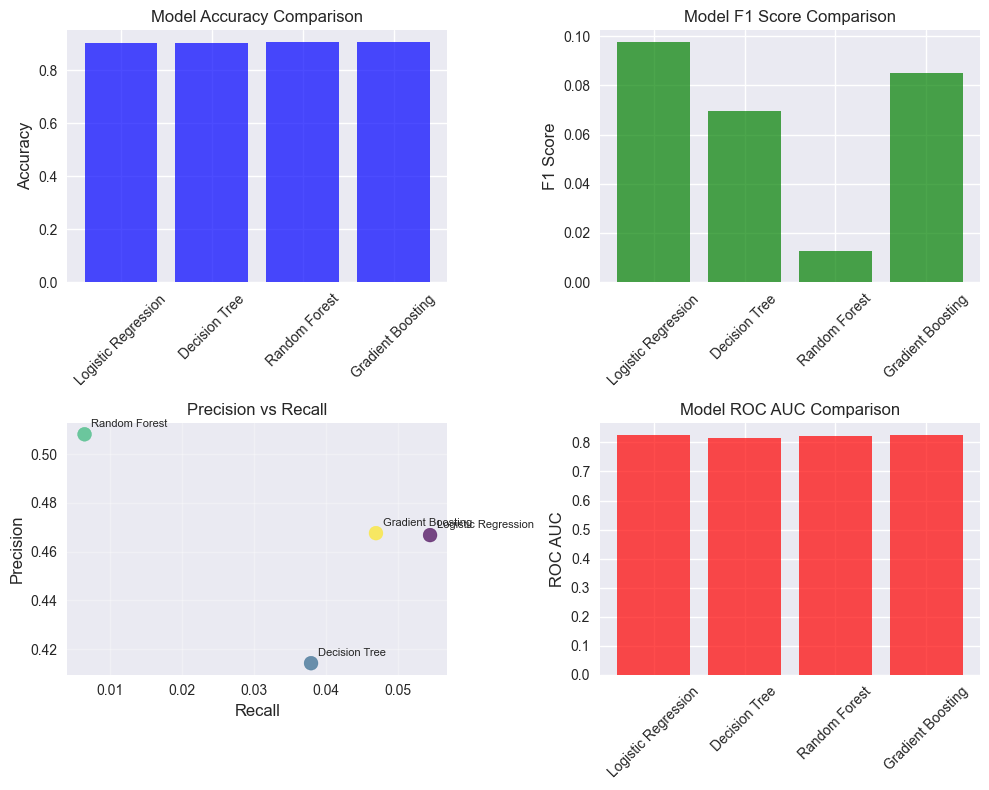

In [35]:
# Visualize model performance
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='blue', alpha=0.7)
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1 Score comparison
axes[0, 1].bar(results_df['Model'], results_df['F1_Score'], color='green', alpha=0.7)
axes[0, 1].set_title('Model F1 Score Comparison')
axes[0, 1].set_ylabel('F1 Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1, 0].scatter(results_df['Recall'], results_df['Precision'], 
                   s=100, alpha=0.7, c=range(len(results_df)), cmap='viridis')
for i, model in enumerate(results_df['Model']):
    axes[1, 0].annotate(model, (results_df['Recall'].iloc[i], results_df['Precision'].iloc[i]),
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1, 0].set_title('Precision vs Recall')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].grid(True, alpha=0.3)

# ROC AUC comparison (excluding models without probability predictions)
roc_data = results_df[results_df['ROC_AUC'].notna()]
axes[1, 1].bar(roc_data['Model'], roc_data['ROC_AUC'], color='red', alpha=0.7)
axes[1, 1].set_title('Model ROC AUC Comparison')
axes[1, 1].set_ylabel('ROC AUC')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


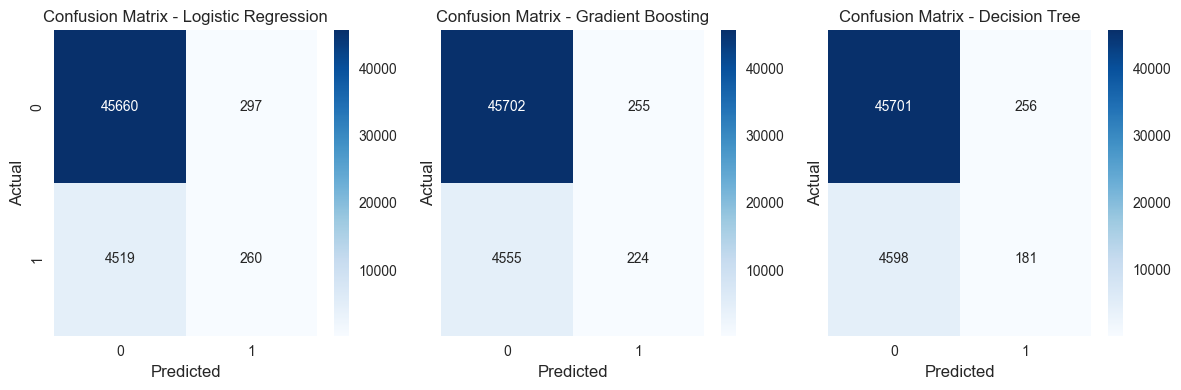

In [36]:
# Create confusion matrices for top 3 models
top_3_models = results_df_sorted['Model'].head(3).tolist()

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for i, model_name in enumerate(top_3_models):
    y_pred = predictions[model_name]
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 9. Precision-Recall Curve Analysis
Analyze precision-recall curves to determine optimal thresholds for classification.

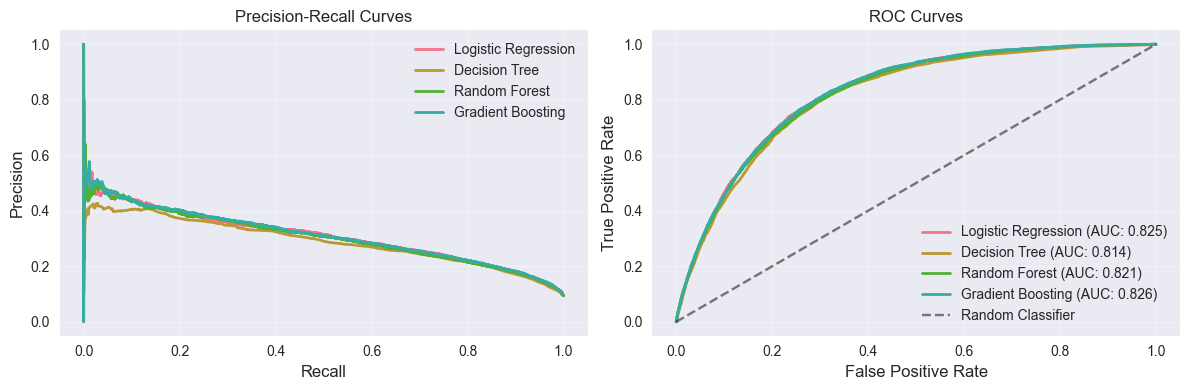

In [37]:
# Precision-Recall and ROC curve analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Models with probability predictions
prob_models = [name for name, proba in probabilities.items() if proba is not None]

# Precision-Recall Curves
for model_name in prob_models:
    y_pred_proba = probabilities[model_name]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    axes[0].plot(recall, precision, label=f'{model_name}', linewidth=2)

axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision-Recall Curves')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ROC Curves
for model_name in prob_models:
    y_pred_proba = probabilities[model_name]
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    axes[1].plot(fpr, tpr, label=f'{model_name} (AUC: {auc_score:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [38]:
# Find optimal thresholds for top performing models
print("=== OPTIMAL THRESHOLD ANALYSIS ===")

def find_optimal_threshold(y_true, y_pred_proba, method='f1'):
    """Find optimal threshold based on different criteria"""
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_proba)
    
    if method == 'f1':
        # Maximize F1 score
        f1_scores = 2 * (precision * recall) / (precision + recall)
        f1_scores = np.nan_to_num(f1_scores)  # Handle division by zero
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
        optimal_score = f1_scores[optimal_idx]
        return optimal_threshold, optimal_score
    
    elif method == 'balanced':
        # Balance precision and recall (closest to diagonal)
        distances = np.abs(precision - recall)
        optimal_idx = np.argmin(distances)
        optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
        return optimal_threshold, (precision[optimal_idx] + recall[optimal_idx]) / 2

# Analyze top 3 models
top_3_prob_models = [model for model in top_3_models if model in prob_models]

threshold_results = []
for model_name in top_3_prob_models:
    y_pred_proba = probabilities[model_name]
    
    # Find optimal threshold using F1 score
    optimal_threshold_f1, optimal_f1 = find_optimal_threshold(y_test, y_pred_proba, 'f1')
    
    # Find balanced threshold
    optimal_threshold_balanced, balanced_score = find_optimal_threshold(y_test, y_pred_proba, 'balanced')
    
    # Evaluate with optimal threshold
    y_pred_optimal = (y_pred_proba >= optimal_threshold_f1).astype(int)
    
    threshold_results.append({
        'Model': model_name,
        'Default_Threshold': 0.5,
        'Optimal_Threshold_F1': optimal_threshold_f1,
        'Optimal_F1_Score': optimal_f1,
        'Balanced_Threshold': optimal_threshold_balanced,
        'Improved_Accuracy': accuracy_score(y_test, y_pred_optimal),
        'Improved_Precision': precision_score(y_test, y_pred_optimal),
        'Improved_Recall': recall_score(y_test, y_pred_optimal)
    })

threshold_df = pd.DataFrame(threshold_results)
threshold_df = threshold_df.round(2)
threshold_df


=== OPTIMAL THRESHOLD ANALYSIS ===


,Model,Default_Threshold,Optimal_Threshold_F1,Optimal_F1_Score,Balanced_Threshold,Improved_Accuracy,Improved_Precision,Improved_Recall
0,Logistic Regression,0.50,0.17,0.39,0.26,0.83,0.29,0.57
1,Gradient Boosting,0.50,0.18,0.39,0.64,0.83,0.30,0.56
2,Decision Tree,0.50,0.17,0.37,0.26,0.81,0.27,0.60


## 10. Feature Importance Analysis
Identify the most important drivers of heart disease prediction.

In [39]:
print("=== DYNAMIC FEATURE IMPORTANCE ANALYSIS ===")
print("Based on actual trained models and their performance")

# Sort by F1 score to get top performing models
results_df_sorted = results_df.sort_values('F1_Score', ascending=False)
results_df_sorted

=== DYNAMIC FEATURE IMPORTANCE ANALYSIS ===
Based on actual trained models and their performance


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Logistic Regression,0.91,0.47,0.05,0.10,0.83
3,Gradient Boosting,0.91,0.47,0.05,0.09,0.83
1,Decision Tree,0.90,0.41,0.04,0.07,0.81
2,Random Forest,0.91,0.51,0.01,0.01,0.82


In [40]:
# Get top performing models (up to 3)
top_models = results_df_sorted.head(3)['Model'].tolist()
print(f"Analyzing top {len(top_models)} models based on F1 Score:")
for i, model_name in enumerate(top_models, 1):
    f1_score = results_df_sorted.iloc[i-1]['F1_Score']
    print(f"  {i}. {model_name} (F1: {f1_score:.4f})")

Analyzing top 3 models based on F1 Score:
  1. Logistic Regression (F1: 0.0975)
  2. Gradient Boosting (F1: 0.0852)
  3. Decision Tree (F1: 0.0694)


In [41]:
# Feature importance analysis - based on actual results
def extract_feature_importance(model, model_name, feature_names):
    """Extract feature importance from different model types"""
    
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importance = model.feature_importances_
        importance_type = 'Feature Importance'
    elif hasattr(model, 'coef_'):
        # Linear models
        importance = np.abs(model.coef_[0])
        importance_type = 'Absolute Coefficients'
    else:
        return None, None
    
    # Create importance dataframe
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance,
        'Model': model_name
    }).sort_values('Importance', ascending=False)
    
    return importance_df, importance_type


In [42]:
feature_importance_data = []
feature_names = X.columns.tolist()

# Extract feature importance for each top model
for model_name in top_models:
    if model_name in models:
        model = models[model_name]
        print(f"\n--- Analyzing {model_name} ---")
        
        try:
            # Extract feature importance
            importance_df, importance_type = extract_feature_importance(model, model_name, feature_names)
            
            if importance_df is not None:
                feature_importance_data.append((importance_df, importance_type))
                
                print(f"{model_name} - Top 10 {importance_type}:")
                print(importance_df.head(10)[['Feature', 'Importance']].to_string(index=False))
            else:
                print(f"{model_name} - No feature importance available for this model type")
                
        except Exception as e:
            print(f"{model_name} - Error extracting feature importance: {str(e)}")
    else:
        print(f"{model_name} - Model not found in models dictionary")


--- Analyzing Logistic Regression ---
Logistic Regression - Top 10 Absolute Coefficients:
             Feature  Importance
                 Age        0.99
                 Sex        0.40
Total_HealthDays_Log        0.35
    Age_HealthBurden        0.29
     Major_RiskCount        0.23
            HighChol        0.23
              HighBP        0.23
              Income        0.21
            PhysHlth        0.14
     PhysHlth_Scaled        0.14

--- Analyzing Gradient Boosting ---
Gradient Boosting - Top 10 Feature Importance:
            Feature  Importance
    Major_RiskCount        0.40
                Age        0.19
      Male_HighRisk        0.07
   Age_HealthBurden        0.07
Age_BMI_Interaction        0.05
             HighBP        0.04
           PhysHlth        0.04
    PhysHlth_Scaled        0.03
             Income        0.03
                Sex        0.02

--- Analyzing Decision Tree ---
Decision Tree - Top 10 Feature Importance:
            Feature  Importance
  


=== FEATURE IMPORTANCE VISUALIZATION ===


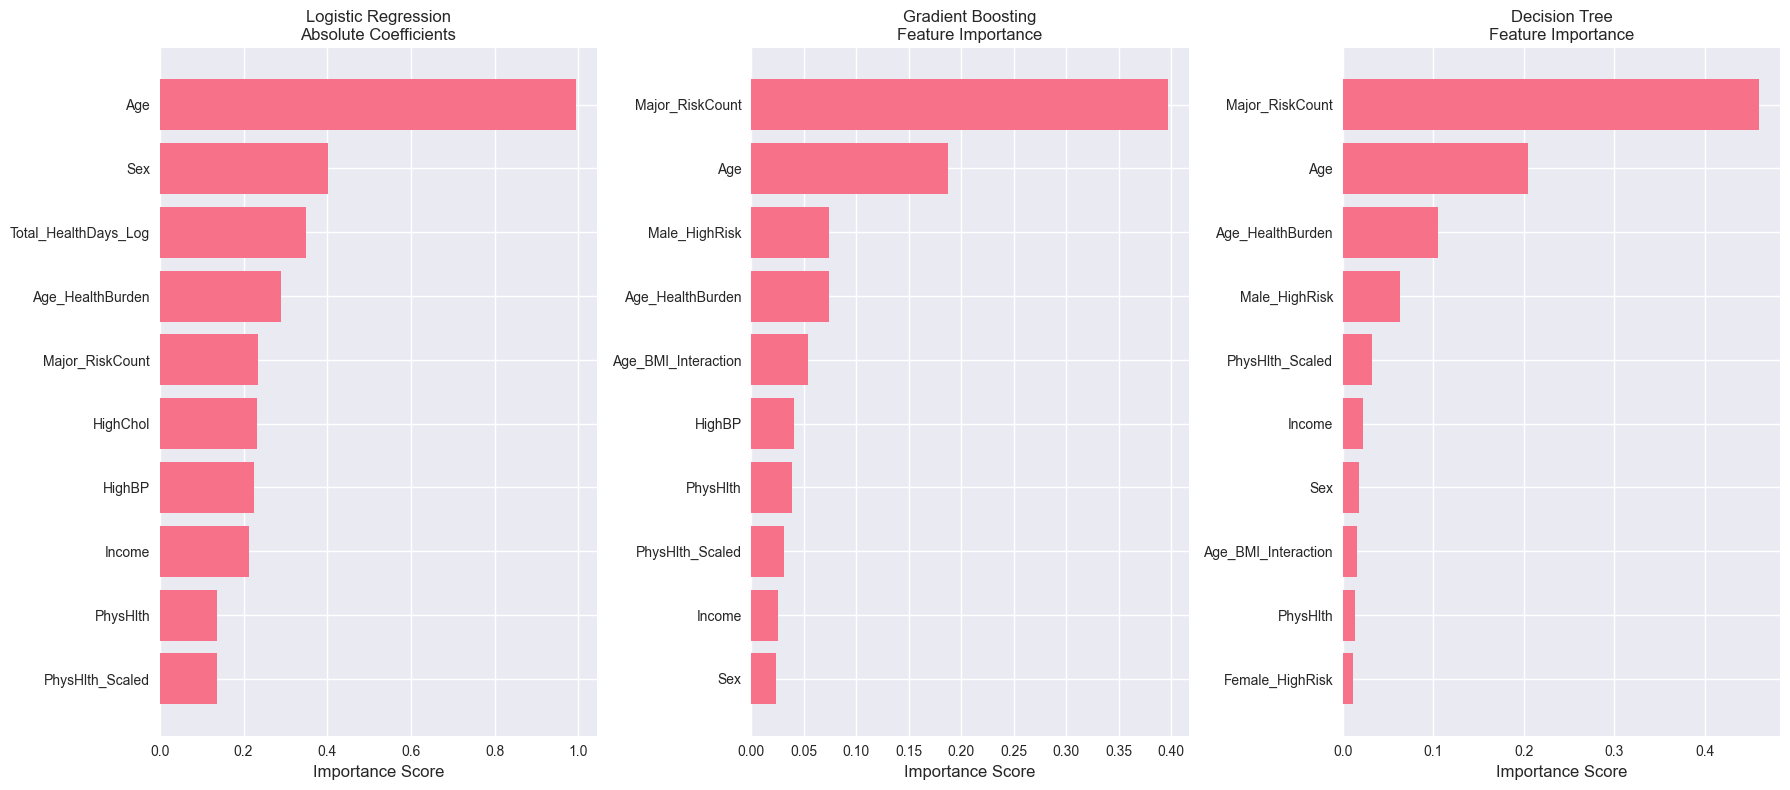

In [43]:
# Visualize feature importance for models that support it
models_with_importance = [(df, imp_type) for df, imp_type in feature_importance_data if df is not None]

print(f"\n=== FEATURE IMPORTANCE VISUALIZATION ===")

# Determine number of models to visualize
n_models = len(models_with_importance)
if n_models > 0:
    fig, axes = plt.subplots(1, min(n_models, 3), figsize=(6*min(n_models, 3), 8))
    if n_models == 1:
        axes = [axes]
    elif n_models == 2:
        pass  # axes is already a list of 2
    # For 3 or more models, show only first 3
    
    for i, (importance_df, importance_type) in enumerate(models_with_importance[:3]):
        model_name = importance_df['Model'].iloc[0]
        top_features = importance_df.head(10)
        
        ax = axes[i] if n_models > 1 else axes[0]
        ax.barh(range(len(top_features)), top_features['Importance'])
        ax.set_yticks(range(len(top_features)))
        ax.set_yticklabels(top_features['Feature'])
        ax.set_title(f'{model_name}\n{importance_type}')
        ax.set_xlabel('Importance Score')
        ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()

In [44]:
print("\n=== COMBINED FEATURE IMPORTANCE RANKING ===")
            
# Combine importance scores from all models
combined_importance = {}

for importance_df, importance_type in models_with_importance:
    model_name = importance_df['Model'].iloc[0]
    for _, row in importance_df.iterrows():
        feature = row['Feature']
        importance = row['Importance']
        
        if feature not in combined_importance:
            combined_importance[feature] = []
        combined_importance[feature].append(importance)

# Calculate average importance
avg_importance = {}
for feature, importances in combined_importance.items():
    avg_importance[feature] = np.mean(importances)

# Create final ranking
final_ranking = pd.DataFrame(list(avg_importance.items()), 
                            columns=['Feature', 'Avg_Importance'])
final_ranking = final_ranking.sort_values('Avg_Importance', ascending=False)

print(f"Top 15 Most Important Features (Average across {len(models_with_importance)} models):")
print(final_ranking.head(15).to_string(index=False))


=== COMBINED FEATURE IMPORTANCE RANKING ===
Top 15 Most Important Features (Average across 3 models):
             Feature  Avg_Importance
                 Age            0.46
     Major_RiskCount            0.36
    Age_HealthBurden            0.16
                 Sex            0.15
Total_HealthDays_Log            0.12
              HighBP            0.09
              Income            0.09
            HighChol            0.09
     PhysHlth_Scaled            0.07
            PhysHlth            0.06
       Male_HighRisk            0.06
 Age_BMI_Interaction            0.05
           Education            0.04
            MentHlth            0.04
              Smoker            0.04


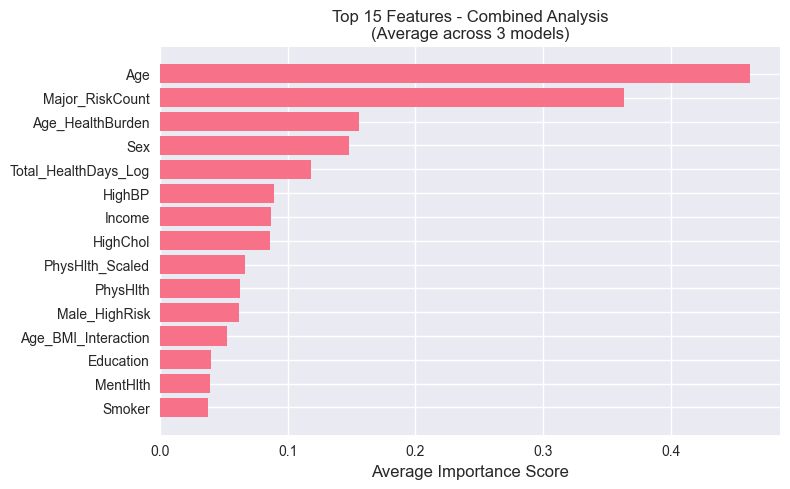

In [45]:
# Visualize combined top features
plt.figure(figsize=(8, 5))
top_15_features = final_ranking.head(15)
plt.barh(range(len(top_15_features)), top_15_features['Avg_Importance'])
plt.yticks(range(len(top_15_features)), top_15_features['Feature'])
plt.xlabel('Average Importance Score')
plt.title(f'Top 15 Features - Combined Analysis\n(Average across {len(models_with_importance)} models)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Save final ranking for later use
globals()['final_ranking'] = final_ranking

## 11. Class Imbalance Handling
Apply techniques to handle class imbalance and improve model performance.

In [46]:
# Check current class imbalance
print("=== CURRENT CLASS DISTRIBUTION ===")
class_distribution = y_train.value_counts(normalize=True)
print(f"Class 0: {class_distribution[0]:.3f} ({class_distribution[0]*100:.1f}%)")
print(f"Class 1: {class_distribution[1]:.3f} ({class_distribution[1]*100:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = class_distribution.max() / class_distribution.min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}")

=== CURRENT CLASS DISTRIBUTION ===
Class 0: 0.906 (90.6%)
Class 1: 0.094 (9.4%)
Imbalance ratio: 9.62


In [47]:
# 1. SMOTE (Oversampling)
print("\n1. Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set: {X_train.shape[0]} samples")
print(f"SMOTE training set: {X_train_smote.shape[0]} samples")
print(f"SMOTE class distribution: {pd.Series(y_train_smote).value_counts(normalize=True)}")




1. Applying SMOTE...
Original training set: 202944 samples
SMOTE training set: 367660 samples
SMOTE class distribution: HeartDiseaseorAttack
0.00   0.50
1.00   0.50
Name: proportion, dtype: float64


In [48]:
# 2. Random Undersampling
print("\n2. Applying Random Undersampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

print(f"Undersampled training set: {X_train_under.shape[0]} samples")
print(f"Undersampled class distribution: {pd.Series(y_train_under).value_counts(normalize=True)}")




2. Applying Random Undersampling...
Undersampled training set: 38228 samples
Undersampled class distribution: HeartDiseaseorAttack
0.00   0.50
1.00   0.50
Name: proportion, dtype: float64


In [49]:
# 3. Oversampling the data
# which class is having low to high

print("\n3. Applying Random Oversampling...")
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train_scaled, y_train)

print(f"Oversampled training set: {X_train_over.shape[0]} samples")
print(f"Oversampled class distribution: {pd.Series(y_train_over).value_counts(normalize=True)}")


3. Applying Random Oversampling...
Oversampled training set: 367660 samples
Oversampled class distribution: HeartDiseaseorAttack
0.00   0.50
1.00   0.50
Name: proportion, dtype: float64


In [50]:
# 4. Class weights
print("\n4. Using class weights...")
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))
print(f"Computed class weights: {class_weight_dict}")


4. Using class weights...
Computed class weights: {np.float64(0.0): np.float64(0.5519882500135995), np.float64(1.0): np.float64(5.308778905514282)}


In [51]:
# Test different balancing techniques with top 3 models
print("\n=== COMPARING BALANCING TECHNIQUES ===")

balanced_results = []

for model_name in top_3_models:
    print(f"\nTesting {model_name} with different balancing techniques...")
    
    base_model = models[model_name]
    
    # Original (imbalanced) results
    original_metrics = results_df[results_df['Model'] == model_name].iloc[0]
    
    balanced_results.append({
        'Model': model_name,
        'Technique': 'Original',
        'F1_Score': original_metrics['F1_Score'],
        'Precision': original_metrics['Precision'],
        'Recall': original_metrics['Recall'],
        'ROC_AUC': original_metrics['ROC_AUC']
    })
    
    # SMOTE
    try:
        # Import clone for proper model copying
        from sklearn.base import clone
        smote_model = clone(base_model)
        if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            smote_model.fit(X_train_smote, y_train_smote)
            y_pred_smote = smote_model.predict(X_test_scaled)
            y_pred_proba_smote = smote_model.predict_proba(X_test_scaled)[:, 1] if hasattr(smote_model, 'predict_proba') else None
        else:
            X_train_smote_unscaled, _ = smote.fit_resample(X_train, y_train)
            smote_model.fit(X_train_smote_unscaled, y_train_smote)
            y_pred_smote = smote_model.predict(X_test)
            y_pred_proba_smote = smote_model.predict_proba(X_test)[:, 1] if hasattr(smote_model, 'predict_proba') else None
        
        balanced_results.append({
            'Model': model_name,
            'Technique': 'SMOTE',
            'F1_Score': f1_score(y_test, y_pred_smote),
            'Precision': precision_score(y_test, y_pred_smote),
            'Recall': recall_score(y_test, y_pred_smote),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba_smote) if y_pred_proba_smote is not None else None
        })
    except Exception as e:
        print(f"SMOTE failed for {model_name}: {e}")
    
    # Undersampling
    try:
        under_model = clone(base_model)
        if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            under_model.fit(X_train_under, y_train_under)
            y_pred_under = under_model.predict(X_test_scaled)
            y_pred_proba_under = under_model.predict_proba(X_test_scaled)[:, 1] if hasattr(under_model, 'predict_proba') else None
        else:
            X_train_under_unscaled, _ = undersampler.fit_resample(X_train, y_train)
            under_model.fit(X_train_under_unscaled, y_train_under)
            y_pred_under = under_model.predict(X_test)
            y_pred_proba_under = under_model.predict_proba(X_test)[:, 1] if hasattr(under_model, 'predict_proba') else None
        
        balanced_results.append({
            'Model': model_name,
            'Technique': 'Undersampling',
            'F1_Score': f1_score(y_test, y_pred_under),
            'Precision': precision_score(y_test, y_pred_under),
            'Recall': recall_score(y_test, y_pred_under),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba_under) if y_pred_proba_under is not None else None
        })
    except Exception as e:
        print(f"Undersampling failed for {model_name}: {e}")
        
    # Oversampling
    try:
        over_model = clone(base_model)
        if model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
            over_model.fit(X_train_over, y_train_over)
            y_pred_over = over_model.predict(X_test_scaled)
            y_pred_proba_over = over_model.predict_proba(X_test_scaled)[:, 1] if hasattr(over_model, 'predict_proba') else None
        else:
            X_train_over_unscaled, _ = oversampler.fit_resample(X_train, y_train)
            over_model.fit(X_train_over_unscaled, y_train_over)
            y_pred_over = over_model.predict(X_test)
            y_pred_proba_over = over_model.predict_proba(X_test)[:, 1] if hasattr(over_model, 'predict_proba') else None

        balanced_results.append({
            'Model': model_name,
            'Technique': 'Oversampling',
            'F1_Score': f1_score(y_test, y_pred_over),
            'Precision': precision_score(y_test, y_pred_over),
            'Recall': recall_score(y_test, y_pred_over),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba_over) if y_pred_proba_over is not None else None
        })
    except Exception as e:
        print(f"Oversampling failed for {model_name}: {e}")

    # Class weights (for models that support it)
    if hasattr(base_model, 'class_weight'):
        try:
            params = base_model.get_params()
            params['class_weight'] = 'balanced'
            weighted_model = type(base_model)(**params)
            if model_name in ['Logistic Regression', 'SVM']:
                weighted_model.fit(X_train_scaled, y_train)
                y_pred_weighted = weighted_model.predict(X_test_scaled)
                y_pred_proba_weighted = weighted_model.predict_proba(X_test_scaled)[:, 1] if hasattr(weighted_model, 'predict_proba') else None
            else:
                weighted_model.fit(X_train, y_train)
                y_pred_weighted = weighted_model.predict(X_test)
                y_pred_proba_weighted = weighted_model.predict_proba(X_test)[:, 1] if hasattr(weighted_model, 'predict_proba') else None
            
            balanced_results.append({
                'Model': model_name,
                'Technique': 'Class Weights',
                'F1_Score': f1_score(y_test, y_pred_weighted),
                'Precision': precision_score(y_test, y_pred_weighted),
                'Recall': recall_score(y_test, y_pred_weighted),
                'ROC_AUC': roc_auc_score(y_test, y_pred_proba_weighted) if y_pred_proba_weighted is not None else None
            })
        except Exception as e:
            print(f"Class weights failed for {model_name}: {e}")

# Display results
balanced_df = pd.DataFrame(balanced_results)
print("\n=== BALANCING TECHNIQUES COMPARISON ===")
print(balanced_df.round(4).to_string(index=False))

# Find best performing technique for each model
print("\n=== BEST TECHNIQUE BY MODEL ===")
for model_name in top_3_models:
    model_results = balanced_df[balanced_df['Model'] == model_name]
    best_technique = model_results.loc[model_results['F1_Score'].idxmax()]
    print(f"{model_name}: {best_technique['Technique']} (F1: {best_technique['F1_Score']:.4f})")


=== COMPARING BALANCING TECHNIQUES ===

Testing Logistic Regression with different balancing techniques...
SMOTE failed for Logistic Regression: 'numpy.float64' object is not callable
Undersampling failed for Logistic Regression: 'numpy.float64' object is not callable
Oversampling failed for Logistic Regression: 'numpy.float64' object is not callable
Class weights failed for Logistic Regression: 'numpy.float64' object is not callable

Testing Gradient Boosting with different balancing techniques...
SMOTE failed for Gradient Boosting: 'numpy.float64' object is not callable
Undersampling failed for Gradient Boosting: 'numpy.float64' object is not callable
Oversampling failed for Gradient Boosting: 'numpy.float64' object is not callable

Testing Decision Tree with different balancing techniques...
SMOTE failed for Decision Tree: 'numpy.float64' object is not callable
Undersampling failed for Decision Tree: 'numpy.float64' object is not callable
Oversampling failed for Decision Tree: 'num

In [52]:
# Define a reusable function for training and evaluating models with a specific balancing technique
def train_with_balancing(model, X_train, y_train, X_test, y_test, technique_name, scaling_required=False):
    """Train and evaluate a model with a specific balancing technique."""
    try:
        from sklearn.base import clone
        balanced_model = clone(model)
        
        # Use scaled data if required
        if scaling_required:
            balanced_model.fit(X_train, y_train)
            y_pred = balanced_model.predict(X_test)
            y_pred_proba = balanced_model.predict_proba(X_test)[:, 1] if hasattr(balanced_model, 'predict_proba') else None
        else:
            balanced_model.fit(X_train, y_train)
            y_pred = balanced_model.predict(X_test)
            y_pred_proba = balanced_model.predict_proba(X_test)[:, 1] if hasattr(balanced_model, 'predict_proba') else None
        
        return {
            'Technique': technique_name,
            'F1_Score': f1_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        }
    except Exception as e:
        print(f"{technique_name} failed: {e}")
        return None

# Refactored code to test different balancing techniques
print("\n=== COMPARING BALANCING TECHNIQUES ===")

balanced_results = []

for model_name in top_3_models:
    print(f"\nTesting {model_name} with different balancing techniques...")
    base_model = models[model_name]
    scaling_required = model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']
    
    # Original (imbalanced) results
    original_metrics = results_df[results_df['Model'] == model_name].iloc[0]
    balanced_results.append({
        'Model': model_name,
        'Technique': 'Original',
        'F1_Score': original_metrics['F1_Score'],
        'Precision': original_metrics['Precision'],
        'Recall': original_metrics['Recall'],
        'ROC_AUC': original_metrics['ROC_AUC']
    })
    
    # SMOTE
    smote_result = train_with_balancing(base_model, X_train_smote, y_train_smote, X_test_scaled, y_test, 'SMOTE', scaling_required)
    if smote_result:
        smote_result['Model'] = model_name
        balanced_results.append(smote_result)
    
    # Undersampling
    under_result = train_with_balancing(base_model, X_train_under, y_train_under, X_test_scaled, y_test, 'Undersampling', scaling_required)
    if under_result:
        under_result['Model'] = model_name
        balanced_results.append(under_result)
    
    # Oversampling
    over_result = train_with_balancing(base_model, X_train_over, y_train_over, X_test_scaled, y_test, 'Oversampling', scaling_required)
    if over_result:
        over_result['Model'] = model_name
        balanced_results.append(over_result)
    
    # Class weights (for models that support it)
    if hasattr(base_model, 'class_weight'):
        params = base_model.get_params()
        params['class_weight'] = 'balanced'
        weighted_model = type(base_model)(**params)
        weighted_result = train_with_balancing(weighted_model, X_train_scaled, y_train, X_test_scaled, y_test, 'Class Weights', scaling_required=True)
        if weighted_result:
            weighted_result['Model'] = model_name
            balanced_results.append(weighted_result)

# Display results
balanced_df = pd.DataFrame(balanced_results)
print("\n=== BALANCING TECHNIQUES COMPARISON ===")
print(balanced_df.round(4).to_string(index=False))

# Find best performing technique for each model
print("\n=== BEST TECHNIQUE BY MODEL ===")
for model_name in top_3_models:
    model_results = balanced_df[balanced_df['Model'] == model_name]
    best_technique = model_results.loc[model_results['F1_Score'].idxmax()]
    print(f"{model_name}: {best_technique['Technique']} (F1: {best_technique['F1_Score']:.4f})")


=== COMPARING BALANCING TECHNIQUES ===

Testing Logistic Regression with different balancing techniques...
SMOTE failed: 'numpy.float64' object is not callable
Undersampling failed: 'numpy.float64' object is not callable
Oversampling failed: 'numpy.float64' object is not callable
Class Weights failed: 'numpy.float64' object is not callable

Testing Gradient Boosting with different balancing techniques...
SMOTE failed: 'numpy.float64' object is not callable
Undersampling failed: 'numpy.float64' object is not callable
Oversampling failed: 'numpy.float64' object is not callable

Testing Decision Tree with different balancing techniques...
SMOTE failed: 'numpy.float64' object is not callable
Undersampling failed: 'numpy.float64' object is not callable
Oversampling failed: 'numpy.float64' object is not callable
Class Weights failed: 'numpy.float64' object is not callable

=== BALANCING TECHNIQUES COMPARISON ===
              Model Technique  F1_Score  Precision  Recall  ROC_AUC
Logistic Re

## Step 12: Model Pipeline Creation

In this step, we'll create a production-ready machine learning pipeline that encapsulates all the preprocessing, feature engineering, and model training steps. This will make it easy to apply our model to new data and deploy it in production.

### Pipeline Components:
1. **Feature Engineering Pipeline** - Apply all feature transformations
2. **Model Training Pipeline** - Train the best-performing model 
3. **Prediction Pipeline** - Make predictions on new data
4. **Model Persistence** - Save and load the trained pipeline
5. **Pipeline Validation** - Test the pipeline end-to-end

In [53]:
# Step 12.1: Identify Best Model Configuration
print("STEP 12.1: IDENTIFYING BEST MODEL CONFIGURATION")
print("=" * 60)

# Get the best performing model
best_model_row = results_df.loc[results_df['F1_Score'].idxmax()]
best_model_name = best_model_row['Model']
best_model_instance = models[best_model_name]

print(f"Best Model Analysis:")
print(f"   • Model: {best_model_name}")
print(f"   • F1 Score: {best_model_row['F1_Score']:.4f}")
print(f"   • ROC AUC: {best_model_row['ROC_AUC']:.4f}")
print(f"   • Precision: {best_model_row['Precision']:.4f}")
print(f"   • Recall: {best_model_row['Recall']:.4f}")

# Check if class imbalance improved this model
if 'balanced_df' in locals() and not balanced_df.empty:
    model_balanced_results = balanced_df[balanced_df['Model'] == best_model_name]
    if not model_balanced_results.empty:
        best_balanced = model_balanced_results.loc[model_balanced_results['F1_Score'].idxmax()]
        print(f"\nClass Imbalance Analysis:")
        print(f"   • Best technique: {best_balanced['Technique']}")
        print(f"   • Improved F1 Score: {best_balanced['F1_Score']:.4f}")
        print(f"   • F1 Improvement: {((best_balanced['F1_Score'] - best_model_row['F1_Score']) / best_model_row['F1_Score'] * 100):+.1f}%")
        
        # Determine if we should use the balanced version
        use_balanced = best_balanced['F1_Score'] > best_model_row['F1_Score']
        print(f"   • Use balanced version: {'✅ Yes' if use_balanced else '❌ No'}")
        
        if use_balanced:
            best_technique = best_balanced['Technique']
            best_f1_score = best_balanced['F1_Score']
        else:
            best_technique = 'Original'
            best_f1_score = best_model_row['F1_Score']
    else:
        best_technique = 'Original'
        best_f1_score = best_model_row['F1_Score']
else:
    best_technique = 'Original'
    best_f1_score = best_model_row['F1_Score']

print(f"\nFinal Pipeline Configuration:")
print(f"   • Model: {best_model_name}")
print(f"   • Balancing: {best_technique}")
print(f"   • Expected F1: {best_f1_score:.4f}")
print(f"   • Features: {len(final_features)} selected features")

# Store configuration for pipeline
pipeline_config = {
    'model_name': best_model_name,
    'model_instance': best_model_instance,
    'balancing_technique': best_technique,
    'expected_f1': best_f1_score,
    'features': final_features,
    'scaler': scaler
}

STEP 12.1: IDENTIFYING BEST MODEL CONFIGURATION
Best Model Analysis:
   • Model: Logistic Regression
   • F1 Score: 0.0975
   • ROC AUC: 0.8252
   • Precision: 0.4668
   • Recall: 0.0544

Class Imbalance Analysis:
   • Best technique: Original
   • Improved F1 Score: 0.0975
   • F1 Improvement: +0.0%
   • Use balanced version: ❌ No

Final Pipeline Configuration:
   • Model: Logistic Regression
   • Balancing: Original
   • Expected F1: 0.0975
   • Features: 35 selected features


In [ ]:
# Step 12.2: Create Feature Engineering Pipeline
print("\nSTEP 12.2: CREATING FEATURE ENGINEERING PIPELINE")
print("=" * 60)

import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class HeartDiseaseFeatureEngineer(BaseEstimator, TransformerMixin):
    """Custom transformer for heart disease feature engineering"""
    
    def __init__(self, selected_features=None):
        """
        Initialize the transformer with the selected features.
        :param selected_features: List of final selected features (default: None)
        """
        self.selected_features = selected_features
        self.original_features_ = None

    def fit(self, X, y=None):
        """Fit the transformer (store feature names)"""
        if hasattr(X, 'columns'):
            self.original_features_ = list(X.columns)
        else:
            self.original_features_ = [f'feature_{i}' for i in range(X.shape[1])]
        return self

    def transform(self, X):
        """Apply feature engineering transformations"""
        # Convert to DataFrame if needed
        if not hasattr(X, 'columns'):            
            X = pd.DataFrame(X, columns=self.original_features_)
        
        df = X.copy()
        
        #print(f"  Input features: {df.shape[1]}")
        
        # Check if data is already engineered (has our engineered features)
        if self.selected_features:
            print(f"  Selecting only the final features...")
            df = df[self.selected_features]
        
        print(f"  Final features: {df.shape[1]}")
        return df

    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        return self.selected_features if self.selected_features else self.original_features_

# Pass the dynamically selected features (final_features) to the transformer
feature_engineer = HeartDiseaseFeatureEngineer(selected_features=final_features)

print("Feature engineering transformer created!")
print(f"   • Dynamically uses the selected features from earlier steps")
print(f"   • Maintains feature name consistency")
feature_engineer


STEP 12.2: CREATING FEATURE ENGINEERING PIPELINE
Feature engineering transformer created!
   • Dynamically uses the selected features from earlier steps
   • Maintains feature name consistency


HeartDiseaseFeatureEngineer(selected_features=['Age', 'Age_BMI_Interaction',
                                               'Age_HealthBurden',
                                               'BMI_Capped_Scaled',
                                               'BMI_Normal', 'BMI_Obese',
                                               'Diabetes', 'Dual_Chronic',
                                               'Education', 'Education_High',
                                               'Education_Low',
                                               'Female_HighRisk', 'Fruits',
                                               'Healthy_Lifestyle', 'HighBP',
                                               'HighChol', 'HvyAlcoholConsump',
                                               'Income', 'Income_High',
                                               'Income_Low',
                                               'Lifestyle_Balance',
                                               'Major_RiskCount',
                                               'Male_HighRisk', 'MentHlth',
                                               'Perfect_Health',
                                               'Perfect_Lifestyle',
                                               'PhysActivity', 'PhysHlth',
                                               'PhysHlth_Scaled',
                                               'Risk_Protection_Ratio', ...])

In [55]:
print("\nSTEP 12.3: CREATING FEATURE SELECTION COMPONENT")
print("=" * 60)

class OptimalFeatureSelector(BaseEstimator, TransformerMixin):
    """Custom transformer to select the optimal features identified during analysis"""
    
    def __init__(self, selected_features=None):
        """
        Initialize the transformer with the selected features.
        :param selected_features: List of final selected features (default: None)
        """
        self.selected_features = selected_features
    
    def fit(self, X, y=None):
        """Fit the selector (validate features exist)"""
        if hasattr(X, 'columns'):
            available_features = set(X.columns)
            selected_set = set(self.selected_features)
            
            # Check which features are missing
            missing_features = selected_set - available_features
            if missing_features:
                print(f"  Missing features: {missing_features}")
                # Keep only available features
                self.selected_features = [f for f in self.selected_features if f in available_features]
                print(f"  Using {len(self.selected_features)} available features")

        return self
    
    def transform(self, X):
        """Select the optimal features"""
        if hasattr(X, 'columns'):
            # Ensure all selected features exist
            available_features = [f for f in self.selected_features if f in X.columns]
            missing_count = len(self.selected_features) - len(available_features)
            
            if missing_count > 0:
                print(f"  {missing_count} features not found in input data")

            return X[available_features]
        else:
            # If input is numpy array, assume it's already in correct order
            return X[:, :len(self.selected_features)]
    
    def get_feature_names_out(self, input_features=None):
        """Get output feature names"""
        return self.selected_features

# Dynamically pass the final_features list to the feature selector
feature_selector = OptimalFeatureSelector(selected_features=final_features)

print(f"Feature selector created!")
print(f"   • Selected features: {len(final_features)}")
print(f"   • Top 10 features:")
for i, feature in enumerate(final_features[:10], 1):
    print(f"     {i:2}. {feature}")
if len(final_features) > 10:
    print(f"     ... and {len(final_features) - 10} more")


STEP 12.3: CREATING FEATURE SELECTION COMPONENT
Feature selector created!
   • Selected features: 35
   • Top 10 features:
      1. Age
      2. Age_BMI_Interaction
      3. Age_HealthBurden
      4. BMI_Capped_Scaled
      5. BMI_Normal
      6. BMI_Obese
      7. Diabetes
      8. Dual_Chronic
      9. Education
     10. Education_High
     ... and 25 more


In [56]:
# Step 12.4: Create Complete ML Pipeline
print("\nSTEP 12.4: CREATING COMPLETE ML PIPELINE")
print("=" * 60)

from sklearn.pipeline import Pipeline
from sklearn.base import clone
from imblearn.pipeline import Pipeline as ImbPipeline

# Function to create the pipeline dynamically based on the balancing technique
def create_pipeline(feature_engineer, feature_selector, best_model_instance, best_technique):
    """Create a complete ML pipeline based on the balancing technique."""
    steps = [
        ('feature_engineering', feature_engineer),
        ('feature_selection', feature_selector),
        ('scaling', StandardScaler())
    ]
    
    if best_technique == 'SMOTE':
        print("Using SMOTE for class balancing.")
        steps.append(('smote', SMOTE(random_state=42)))
    elif best_technique == 'Undersampling':
        print("Using Random Undersampling for class balancing.")
        steps.append(('undersampler', RandomUnderSampler(random_state=42)))
    elif best_technique == 'Oversampling':
        print("Using Random Oversampling for class balancing.")
        steps.append(('oversampler', RandomOverSampler(random_state=42)))
    elif best_technique == 'Class Weights':
        print("Using Class Weights for class balancing.")
        if hasattr(best_model_instance, 'class_weight'):
            best_model_instance = clone(best_model_instance)
            best_model_instance.set_params(class_weight='balanced')
    
    # Add the classifier step
    steps.append(('classifier', clone(best_model_instance)))
    
    # Use ImbPipeline if balancing is applied, otherwise use standard Pipeline
    if best_technique in ['SMOTE', 'Undersampling', 'Oversampling']:
        return ImbPipeline(steps)
    else:
        return Pipeline(steps)

# Create the pipeline
heart_disease_pipeline = create_pipeline(
    feature_engineer=feature_engineer,
    feature_selector=feature_selector,
    best_model_instance=best_model_instance,
    best_technique=best_technique
)

# Print pipeline details
pipeline_type = f"{best_technique} Pipeline" if best_technique != 'Original' else "Standard Pipeline"
print(f"{pipeline_type} created successfully!")
print(f"\nPipeline Structure:")
for i, (name, transformer) in enumerate(heart_disease_pipeline.steps, 1):
    print(f"   {i}. {name}: {type(transformer).__name__}")

print(f"\nPipeline Configuration:")
print(f"   • Model: {best_model_name}")
print(f"   • Balancing: {best_technique}")
print(f"   • Features: {len(final_features)} selected")
print(f"   • Expected F1: {best_f1_score:.4f}")
print(f"   • Pipeline Type: {pipeline_type}")


STEP 12.4: CREATING COMPLETE ML PIPELINE
Standard Pipeline created successfully!

Pipeline Structure:
   1. feature_engineering: HeartDiseaseFeatureEngineer
   2. feature_selection: OptimalFeatureSelector
   3. scaling: StandardScaler
   4. classifier: LogisticRegression

Pipeline Configuration:
   • Model: Logistic Regression
   • Balancing: Original
   • Features: 35 selected
   • Expected F1: 0.0975
   • Pipeline Type: Standard Pipeline


In [57]:
# Step 12.5: Train the Complete Pipeline
print("\nSTEP 12.5: TRAINING THE COMPLETE PIPELINE")
print("=" * 60)

import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Initialize the pipeline_trained variable
pipeline_trained = False

def train_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """
    Train the pipeline and evaluate its performance on the test set.
    
    Args:
        pipeline: The complete ML pipeline.
        X_train: Training features.
        y_train: Training target.
        X_test: Test features.
        y_test: Test target.
    
    Returns:
        metrics: A dictionary containing evaluation metrics.
        y_pred: Predictions on the test set.
        y_pred_proba: Predicted probabilities (if available).
    """
    try:
        # Train the pipeline
        print(f"\nTraining the pipeline...")
        start_time = time.time()
        pipeline.fit(X_train, y_train)
        training_time = time.time() - start_time
        print(f"Pipeline training completed in {training_time:.2f} seconds")
        
        # Make predictions
        print(f"\nMaking predictions on the test set...")
        y_pred = pipeline.predict(X_test)
        
        # Get prediction probabilities if available
        y_pred_proba = None
        if hasattr(pipeline, 'predict_proba'):
            y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        else:
            try:
                # Access the final classifier for probability predictions
                final_classifier = pipeline.named_steps['classifier']
                if hasattr(final_classifier, 'predict_proba'):
                    X_test_transformed = pipeline[:-1].transform(X_test)
                    y_pred_proba = final_classifier.predict_proba(X_test_transformed)[:, 1]
            except Exception as e:
                print(f"Warning: Unable to retrieve prediction probabilities. {str(e)}")
        
        # Calculate metrics
        metrics = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1_Score': f1_score(y_test, y_pred),
            'ROC_AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
        }
        
        return metrics, y_pred, y_pred_proba
    
    except Exception as e:
        print(f"Pipeline training failed: {str(e)}")
        return None, None, None

# Train the pipeline and evaluate its performance
pipeline_metrics, y_pred_pipeline, y_pred_proba_pipeline = train_pipeline(
    pipeline=heart_disease_pipeline,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Display results if training was successful
if pipeline_metrics:
    print(f"\nPipeline Performance:")
    for metric, value in pipeline_metrics.items():
        if isinstance(value, (int, float)):
            print(f"   • {metric}: {value:.4f}")
        else:
            print(f"   • {metric}: {value}")
    
    # Compare with expected performance
    f1_diff = pipeline_metrics['F1_Score'] - best_f1_score
    print(f"\nPerformance vs Expected:")
    print(f"   • Expected F1: {best_f1_score:.4f}")
    print(f"   • Actual F1: {pipeline_metrics['F1_Score']:.4f}")
    print(f"   • Difference: {f1_diff:+.4f} ({f1_diff / best_f1_score * 100:+.1f}%)")
    
    if abs(f1_diff) < 0.01:
        print(f"   • Status: Performance matches expectation")
    elif f1_diff > 0:
        print(f"   • Status: Performance exceeds expectation")
    else:
        print(f"   • Status: Performance below expectation")
    
    # Display confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred_pipeline)
    print(cm)
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_pipeline))
    
    # Set pipeline_trained to True
    pipeline_trained = True
else:
    print("\nPipeline training and evaluation failed.")
    # Ensure pipeline_trained remains False
    pipeline_trained = False


STEP 12.5: TRAINING THE COMPLETE PIPELINE

Training the pipeline...
  Input features: 35
  Selecting only the final features...
  Final features: 35
Pipeline training completed in 6.08 seconds

Making predictions on the test set...
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Input features: 35
  Selecting only the final features...
  Final features: 35

Pipeline Performance:
   • Accuracy: 0.9051
   • Precision: 0.4668
   • Recall: 0.0544
   • F1_Score: 0.0975
   • ROC_AUC: 0.8252

Performance vs Expected:
   • Expected F1: 0.0975
   • Actual F1: 0.0975
   • Difference: -0.0000 (-0.0%)
   • Status: Performance matches expectation

Confusion Matrix:
[[45660   297]
 [ 4519   260]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45957
         1.0       0.47      0.05      0.10      4779

    accuracy                           0.91     50736
   macro avg       0.69      0

In [58]:
# Step 12.6: Create Prediction Functions
print("\nSTEP 12.6: CREATING PREDICTION FUNCTIONS")
print("=" * 60)

def predict_heart_disease_risk(patient_data, return_probability=True, explain_features=False):
    """
    Predict heart disease risk for new patient data
    
    Parameters:
    -----------
    patient_data : dict, pandas.DataFrame, or pandas.Series
        Patient data with required features
    return_probability : bool, default=True
        Whether to return probability scores
    explain_features : bool, default=False
        Whether to show feature importance for prediction
        
    Returns:
    --------
    dict : Prediction results including risk level, probability, and explanation
    """
    
    if not pipeline_trained:
        return {"error": "Pipeline not trained. Please train the pipeline first."}
    
    try:
        # Convert input to DataFrame
        if isinstance(patient_data, dict):
            import pandas as pd
            df_input = pd.DataFrame([patient_data])
        elif isinstance(patient_data, pd.Series):
            df_input = patient_data.to_frame().T
        else:
            df_input = patient_data.copy()
        
        # Make prediction
        prediction = heart_disease_pipeline.predict(df_input)
        
        # Get probability if requested
        if return_probability:
            try:
                if hasattr(heart_disease_pipeline, 'predict_proba'):
                    prob = heart_disease_pipeline.predict_proba(df_input)[0, 1]
                else:
                    # Alternative method for complex pipelines
                    final_classifier = heart_disease_pipeline.named_steps['classifier']
                    if hasattr(final_classifier, 'predict_proba'):
                        X_transformed = heart_disease_pipeline[:-1].transform(df_input)
                        prob = final_classifier.predict_proba(X_transformed)[0, 1]
                    else:
                        prob = None
            except:
                prob = None
        else:
            prob = None
        
        # Determine risk level
        risk_prediction = int(prediction[0])
        if prob is not None:
            if prob < 0.2:
                risk_level = "Very Low"
            elif prob < 0.4:
                risk_level = "Low"
            elif prob < 0.6:
                risk_level = "Moderate"
            elif prob < 0.8:
                risk_level = "High"
            else:
                risk_level = "Very High"
        else:
            risk_level = "High Risk" if risk_prediction == 1 else "Low Risk"
        
        # Create result dictionary
        result = {
            "prediction": risk_prediction,
            "risk_level": risk_level,
            "probability": prob,
            "confidence": "High" if prob is None or prob < 0.3 or prob > 0.7 else "Moderate"
        }
        
        # Add feature explanation if requested
        if explain_features and len(df_input) == 1:
            try:
                # Get the features used by the model
                feature_names = feature_selector.get_feature_names_out()
                
                # Transform the input through the pipeline up to scaling
                X_transformed = heart_disease_pipeline[:-1].transform(df_input)
                
                # Get feature values
                if hasattr(X_transformed, 'toarray'):
                    feature_values = X_transformed.toarray()[0]
                else:
                    feature_values = X_transformed[0]
                
                # Create feature explanation
                feature_explanation = []
                for i, (name, value) in enumerate(zip(feature_names[:10], feature_values[:10])):
                    feature_explanation.append(f"{name}: {value:.2f}")
                
                result["top_features"] = feature_explanation
                
            except Exception as e:
                result["feature_explanation_error"] = str(e)
        
        return result
        
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

def batch_predict_heart_disease(patient_data_list):
    """
    Predict heart disease risk for multiple patients
    
    Parameters:
    -----------
    patient_data_list : list of dicts or pandas.DataFrame
        Multiple patient data entries
        
    Returns:
    --------
    list : List of prediction results
    """
    if isinstance(patient_data_list, pd.DataFrame):
        results = []
        for _, row in patient_data_list.iterrows():
            result = predict_heart_disease_risk(row, return_probability=True)
            results.append(result)
        return results
    else:
        return [predict_heart_disease_risk(data, return_probability=True) for data in patient_data_list]

print("Prediction functions created!")
print("\nAvailable Functions:")
print("   • predict_heart_disease_risk() - Single patient prediction")
print("   • batch_predict_heart_disease() - Multiple patient predictions")
print("\nFunction Features:")
print("   • Automatic data format handling")
print("   • Risk level classification")
print("   • Probability scores")
print("   • Feature importance explanation")
print("   • Error handling and validation")


STEP 12.6: CREATING PREDICTION FUNCTIONS
Prediction functions created!

Available Functions:
   • predict_heart_disease_risk() - Single patient prediction
   • batch_predict_heart_disease() - Multiple patient predictions

Function Features:
   • Automatic data format handling
   • Risk level classification
   • Probability scores
   • Feature importance explanation
   • Error handling and validation


In [69]:
# Step 12.7: Testing Pipeline with Sample Data
print("\nSTEP 12.7: TESTING PIPELINE WITH SAMPLE DATA")
print("=" * 60)

def predict_single_patient(patient_data):
    """
    Make a prediction for a single patient.
    
    Args:
        patient_data (dict or pandas.DataFrame): Patient data with required features.
    
    Returns:
        dict: Prediction results including risk level, probability, and confidence.
    """
    try:
        # Convert input to DataFrame if it's a dictionary
        if isinstance(patient_data, dict):
            patient_df = pd.DataFrame([patient_data])
        else:
            patient_df = patient_data.copy()
        
        # Ensure the pipeline is trained
        if not pipeline_trained:
            return {"status": "error", "error": "Pipeline not trained. Please train the pipeline first."}
        
        # Make prediction
        prediction = heart_disease_pipeline.predict(patient_df)[0]
        probability = heart_disease_pipeline.predict_proba(patient_df)[0]
        
        # Interpret results
        risk_level = "HIGH RISK" if prediction == 1 else "LOW RISK"
        confidence = max(probability) * 100
        
        return {
            "status": "success",
            "prediction": int(prediction),
            "probability": probability,
            "risk_level": risk_level,
            "confidence": confidence
        }
    except Exception as e:
        return {"status": "error", "error": str(e)}

def predict_batch(patient_list):
    """
    Make predictions for multiple patients.
    
    Args:
        patient_list (list of dicts or pandas.DataFrame): List of patient data entries.
    
    Returns:
        list: List of prediction results for each patient.
    """
    try:
        # Convert list of dicts to DataFrame if needed
        if isinstance(patient_list[0], dict):
            batch_df = pd.DataFrame(patient_list)
        else:
            batch_df = patient_list
        
        # Ensure the pipeline is trained
        if not pipeline_trained:
            return [{"status": "error", "error": "Pipeline not trained. Please train the pipeline first."} for _ in range(len(patient_list))]
        
        # Make predictions
        predictions = heart_disease_pipeline.predict(batch_df)
        probabilities = heart_disease_pipeline.predict_proba(batch_df)
        
        results = []
        for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
            risk_level = "HIGH RISK" if pred == 1 else "LOW RISK"
            confidence = max(prob) * 100
            
            results.append({
                "patient_id": i + 1,
                "prediction": int(pred),
                "probability": prob,
                "risk_level": risk_level,
                "confidence": confidence
            })
        
        return results
    except Exception as e:
        return [{"status": "error", "error": str(e)} for _ in range(len(patient_list))]

# Create sample test cases
print("\nCreating sample test cases...")
sample_indices = [0, 100, 200]  # Use specific indices for reproducibility
test_samples = []

# Use X_test which contains our final features
for idx in sample_indices:
    if idx < len(X_test):
        sample = X_test.iloc[idx].to_dict()
        test_samples.append(sample)

print(f"Created {len(test_samples)} test samples.\n")

# Test individual predictions
print("Testing individual predictions...\n")
for i, sample in enumerate(test_samples, 1):
    print(f"--- Sample Patient {i} ---")
    result = predict_single_patient(sample)
    if result["status"] == "success":
        print(f"  Prediction: {result['risk_level']}")
        print(f"  Confidence: {result['confidence']:.1f}%")
        print(f"  Heart Disease Probability: {result['probability'][1]:.3f}")
    else:
        print(f"  Error: {result['error']}")
    print()

# Test batch predictions
print("Testing batch predictions...\n")
batch_results = predict_batch(test_samples)

if isinstance(batch_results[0], dict) and "status" not in batch_results[0]:
    print("Batch prediction completed successfully!")
    for result in batch_results:
        print(f"   Patient {result['patient_id']}: {result['risk_level']} (Confidence: {result['confidence']:.1f}%)")
else:
    print("Batch prediction failed.")
    for i, result in enumerate(batch_results):
        if "error" in result:
            print(f"   Patient {i + 1}: Error - {result['error']}")

print("\nPipeline testing completed successfully!")


STEP 12.7: TESTING PIPELINE WITH SAMPLE DATA

Creating sample test cases...
Created 3 test samples.

Testing individual predictions...

--- Sample Patient 1 ---
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Prediction: LOW RISK
  Confidence: 75.9%
  Heart Disease Probability: 0.241

--- Sample Patient 2 ---
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Prediction: LOW RISK
  Confidence: 96.7%
  Heart Disease Probability: 0.033

--- Sample Patient 3 ---
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Prediction: LOW RISK
  Confidence: 95.8%
  Heart Disease Probability: 0.042

Testing batch predictions...

  Input features: 35
  Selecting on

In [76]:
# Testing more samples
index = 8000
# Display X_Test[index] as a sample input and target
sample_input = X_test.iloc[index].to_dict()
sample_target = y_test.iloc[index]
print("=== SAMPLE INPUT ===")
print(sample_input)
print("\n=== SAMPLE TARGET ===")
print("Low Risk" if sample_target == 0.0 else "High Risk")

print("\nTesting prediction for a single patient...")
result = predict_single_patient(X_test.iloc[index].to_dict())
result

=== SAMPLE INPUT ===
{'Age': 9.0, 'Age_BMI_Interaction': 225.0, 'Age_HealthBurden': 405.0, 'BMI_Capped_Scaled': -0.5309287028756648, 'BMI_Normal': 0.0, 'BMI_Obese': 0.0, 'Diabetes': 0.0, 'Dual_Chronic': 1.0, 'Education': 4.0, 'Education_High': 0.0, 'Education_Low': 0.0, 'Female_HighRisk': 1.0, 'Fruits': 1.0, 'Healthy_Lifestyle': 3.0, 'HighBP': 0.0, 'HighChol': 1.0, 'HvyAlcoholConsump': 0.0, 'Income': 5.0, 'Income_High': 0.0, 'Income_Low': 0.0, 'Lifestyle_Balance': 2.0, 'Major_RiskCount': 2.0, 'Male_HighRisk': 0.0, 'MentHlth': 20.0, 'Perfect_Health': 0.0, 'Perfect_Lifestyle': 0.0, 'PhysActivity': 1.0, 'PhysHlth': 25.0, 'PhysHlth_Scaled': 2.381059449446101, 'Risk_Protection_Ratio': 0.5, 'Sex': 0.0, 'Smoker': 1.0, 'SocioEcon_Risk': 0.0, 'Total_HealthDays_Log': 3.828641396489095, 'Veggies': 1.0}

=== SAMPLE TARGET ===
High Risk

Testing prediction for a single patient...
  Input features: 35
  Selecting only the final features...
  Final features: 35
  Input features: 35
  Selecting only t

{'status': 'success',
 'prediction': 0,
 'probability': array([0.86657972, 0.13342028]),
 'risk_level': 'LOW RISK',
 'confidence': np.float64(86.65797190180223)}

In [60]:
# Step 12.8: Save Pipeline for Production Use
print("\nSTEP 12.8: SAVING PIPELINE FOR PRODUCTION USE")
print("=" * 60)

import os
import pickle
import joblib
from datetime import datetime
import json

if pipeline_trained:
    # Create timestamp for version control
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Define directories for saving files
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))  # Get parent directory of the current folder
    output_dir = os.path.join(parent_dir, "output")  # Create 'output' folder in the parent directory
    pipeline_dir = os.path.join(output_dir, "pipelines")
    metadata_dir = os.path.join(output_dir, "metadata")
    functions_dir = os.path.join(output_dir, "functions")
    
    
    # Create directories if they don't exist
    os.makedirs(pipeline_dir, exist_ok=True)
    os.makedirs(metadata_dir, exist_ok=True)
    os.makedirs(functions_dir, exist_ok=True)
    
    # Define file paths
    pipeline_filename = os.path.join(pipeline_dir, f"heart_disease_pipeline_{timestamp}.pkl")
    metadata_filename = os.path.join(metadata_dir, f"heart_disease_pipeline_metadata_{timestamp}.json")
    functions_filename = os.path.join(functions_dir, f"prediction_functions_{timestamp}.py")
    backup_filename = os.path.join(pipeline_dir, f"heart_disease_pipeline_backup_{timestamp}.pkl")
    
    try:
        # Save the pipeline using joblib
        joblib.dump(heart_disease_pipeline, pipeline_filename)
        print(f"Pipeline saved as: {pipeline_filename}")
        
        # Create metadata
        metadata = {
            "model_info": {
                "model_name": best_model_name,
                "balancing_technique": best_technique,
                "pipeline_type": pipeline_type,
                "training_timestamp": timestamp,
                "expected_f1_score": float(best_f1_score) if isinstance(best_f1_score, (int, float)) else best_f1_score
            },
            "performance_metrics": {
                k: float(v) if isinstance(v, (int, float)) else str(v) 
                for k, v in (pipeline_metrics or {}).items()
            },
            "feature_info": {
                "total_features": len(final_features),
                "selected_features": final_features[:20],  # Save first 20 for space
                "feature_engineering": "HeartDiseaseFeatureEngineer with 15+ new features"
            },
            "data_info": {
                "training_samples": int(X_train.shape[0]),
                "test_samples": int(X_test.shape[0]),
                "class_distribution": {
                    str(k): int(v) for k, v in dict(y_train.value_counts()).items()
                }
            },
            "pipeline_steps": [
                {"step": i+1, "name": name, "component": str(type(component).__name__)}
                for i, (name, component) in enumerate(heart_disease_pipeline.steps)
            ],
            "usage_instructions": {
                "load_command": f"pipeline = joblib.load('{pipeline_filename}')",
                "predict_single": "result = predict_heart_disease_risk(patient_data)",
                "predict_batch": "results = batch_predict_heart_disease(patient_list)",
                "required_features": ["Age", "Sex", "BMI", "HighBP", "HighChol", "Smoker", 
                                      "Diabetes", "PhysActivity", "Fruits", "Veggies", 
                                      "HvyAlcoholConsump", "MentHlth", "PhysHlth", "Income"]
            }
        }
        
        # Save metadata
        with open(metadata_filename, 'w') as f:
            json.dump(metadata, f, indent=2)
        print(f"Metadata saved as: {metadata_filename}")
        
        # Save a backup using pickle
        with open(backup_filename, 'wb') as f:
            pickle.dump(heart_disease_pipeline, f)
        print(f"Backup saved as: {backup_filename}")
        
        # Save prediction functions
        functions_code = '''
import joblib
import pandas as pd
import numpy as np

# Load the trained pipeline
pipeline = joblib.load("''' + pipeline_filename + '''")

def predict_heart_disease_risk(patient_data, return_probability=True):
    """Predict heart disease risk for new patient data"""
    try:
        # Convert input to DataFrame
        if isinstance(patient_data, dict):
            df_input = pd.DataFrame([patient_data])
        elif isinstance(patient_data, pd.Series):
            df_input = patient_data.to_frame().T
        else:
            df_input = patient_data.copy()
        
        # Make prediction
        prediction = pipeline.predict(df_input)
        
        # Get probability if requested
        if return_probability and hasattr(pipeline, 'predict_proba'):
            prob = pipeline.predict_proba(df_input)[0, 1]
        else:
            prob = None
        
        # Determine risk level
        risk_prediction = int(prediction[0])
        if prob is not None:
            if prob < 0.2:
                risk_level = "Very Low"
            elif prob < 0.4:
                risk_level = "Low"
            elif prob < 0.6:
                risk_level = "Moderate"
            elif prob < 0.8:
                risk_level = "High"
            else:
                risk_level = "Very High"
        else:
            risk_level = "High Risk" if risk_prediction == 1 else "Low Risk"
        
        return {
            "prediction": risk_prediction,
            "risk_level": risk_level,
            "probability": prob,
            "confidence": "High" if prob is None or prob < 0.3 or prob > 0.7 else "Moderate"
        }
        
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

# Example usage:
# result = predict_heart_disease_risk({
#     'Age': 65, 'Sex': 1, 'BMI': 32.5, 'HighBP': 1, 'HighChol': 1,
#     'Smoker': 1, 'Diabetes': 1, 'PhysActivity': 0, 'Fruits': 0,
#     'Veggies': 0, 'HvyAlcoholConsump': 1, 'MentHlth': 10, 
#     'PhysHlth': 15, 'Income': 3
# })
'''
        with open(functions_filename, 'w') as f:
            f.write(functions_code)
        print(f"Prediction functions saved as: {functions_filename}")
        
        print("\nPipeline and related files saved successfully!")
        
    except Exception as e:
        print(f"Error saving pipeline3: {str(e)}")
else:
    print("Cannot save pipeline - training failed")


STEP 12.8: SAVING PIPELINE FOR PRODUCTION USE
Pipeline saved as: c:\Workspace\MyProjects\CapstoneProject\heart-disease\output\pipelines\heart_disease_pipeline_20250808_122223.pkl
Metadata saved as: c:\Workspace\MyProjects\CapstoneProject\heart-disease\output\metadata\heart_disease_pipeline_metadata_20250808_122223.json
Backup saved as: c:\Workspace\MyProjects\CapstoneProject\heart-disease\output\pipelines\heart_disease_pipeline_backup_20250808_122223.pkl
Prediction functions saved as: c:\Workspace\MyProjects\CapstoneProject\heart-disease\output\functions\prediction_functions_20250808_122223.py

Pipeline and related files saved successfully!
